In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
from sklearn.feature_extraction.text import CountVectorizer

#import spacy and load the language library
import spacy
import re
nlp = spacy.load('en_core_web_sm')

In [114]:
from PIL import Image
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\backpacker\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

### 1. importing data

In [116]:
data = pd.read_csv("Elon_musk.csv",encoding='Latin-1')
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [117]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


### 2. getting data ready

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


### 3. pre-processing text

#### a) removing unwanted symbols and punctuations

In [119]:
# Creating a function to clean the tweets

def cleantwt (twt):
  emoji = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002500-\U00002BEF"  # chinese char
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         u"\U0001f926-\U0001f937"
         u"\U00010000-\U0010ffff"
         u"\u2640-\u2642" 
         u"\u2600-\u2B55"
         u"\u200d"
         u"\u23cf"
         u"\u23e9"
         u"\u231a"
         u"\ufe0f"                  # dingbats
         u"\u3030"
                      "]+", re.UNICODE)

  twt = re.sub('RT', '', twt)                                    # remove 'RT' from tweets
  twt = re.sub('#[A-Za-z0-9]+', '', twt)                         # remove the '#' from the tweets
  twt = re.sub('\\n', '', twt)                                   # remove the '\n' character
  twt = re.sub('https?:\/\/\S+', '', twt)                        # remove the hyperlinks
  twt = re.sub('@[\S]*', '', twt)                                # remove @mentions
  twt = re.sub('^[\s]+|[\s]+$', '', twt)                         # remove leading and trailing whitespaces
  twt = re.sub(emoji, '', twt)                                   # remove emojis
  twt = re.sub("[^A-Za-z]+"," ",twt).lower()                     # converting to lower
  twt = re.sub("[0-9]+"," ",twt)

  return twt

In [120]:
# Create a new column with the cleaned tweets

data['Cleaned_Tweets'] = data['Text'].apply(cleantwt)
data.head()

,Text,Cleaned_Tweets
0,@kunalb11 Im an alien,i m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next leve...
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...


#### b) droping empty rows

In [121]:
data.drop(data[data['Cleaned_Tweets'] == ''].index, inplace = True)

In [122]:
data.reset_index(drop=True, inplace=True)                                

#### c) count vectorizer

In [123]:
vectorizer = CountVectorizer(ngram_range=(1,1))
x = vectorizer.fit_transform(data['Cleaned_Tweets'])
print(x.toarray()) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### d) creating nlp documents for the corpus "Cleaned_Tweets"

In [124]:
def twt (doc):
    doc = nlp(doc)
    return doc

In [125]:
data['twt_doc'] = data['Cleaned_Tweets'].apply(twt)
data.head()

,Text,Cleaned_Tweets,twt_doc
0,@kunalb11 Im an alien,i m an alien,"(i, m, an, alien)"
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next leve...,"(ray, tracing, on, cyberpunk, with, hdr, is, n..."
2,@joerogan @Spotify Great interview!,great interview,"(great, interview)"
3,@gtera27 Doge is underestimated,doge is underestimated,"(doge, is, underestimated)"
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,"(congratulations, tesla, china, for, amazing, ..."


#### e) tokenization

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Text            1933 non-null   object
 1   Cleaned_Tweets  1933 non-null   object
 2   twt_doc         1933 non-null   object
dtypes: object(3)
memory usage: 45.4+ KB


In [127]:
for i in range (0,1933) :
    for token in data['twt_doc'][i] :
        print (token.text,end = '|')
    print ("\n")

i|m|an|alien|

ray|tracing|on|cyberpunk|with|hdr|is|next|level|have|you|tried|it|

great|interview|

doge|is|underestimated|

congratulations|tesla|china|for|amazing|execution|last|year|now|on|to|the|next|for|even|more|

happy|new|year|of|the|ox|

frodo|was|the|underdoge|all|thought|he|would|fail|himself|most|of|all|

haha|thanks|

indeed|tweets|definitely|do|not|represent|real|world|time|allocation|

the|most|entertaining|outcome|is|the|most|likely|

just|sent|some|

just|agree|to|do|clubhouse|with|

it|s|getting|real|

bought|some|dogecoin|for|lil|x|so|he|can|be|a|toddler|hodler|

he|definitely|has|issues|but|the|sentencing|seems|a|bit|high|

thanks|for|fixing|

please|unlock|my|account|

 |u|f|u|f|

this|is|true|power|haha|

any|crypto|wallet|that|won|t|give|you|your|private|keys|should|be|avoided|at|all|costs|

your|app|sucks|

nasa|has|selected|falcon|heavy|to|launch|the|first|two|elements|of|the|lunar|gateway|together|on|one|mission|

yes|

once|we|can|predict|cash|flow|reasonabl

it|s|a|good|path|for|fully|renewable|rocket|energy|so|solves|part|of|problem|but|longer|chain|hyd|

details|next|week|

am|donating|m|towards|a|prize|for|best|carbon|capture|technology|

pretty|much|

that|would|probably|mean|civilization|is|doing|gr|

absolutely|they|rock|u|f|a|

falcon|launches|starlink|to|orbit|the|eighth|launch|and|landing|of|this|booster|

the|rate|limiting|part|or|process|in|cell|production|is|constantly|changing|

cars|amp|trucks|stuck|in|traffic|generate|megatons|of|toxic|gases|amp|particulate|but|

with|our|giant|casting|machines|we|are|literally|trying|to|make|full|size|car|

tegmark|is|an|exceptionally|smart|amp|good|human|

the|best|manufacturing|technology|is|in|ultra|high|volume|industries|like|food|amp|beverage|some|medical|eg|syringes|amp|toys|

battery|cell|production|is|the|fundamental|rate|limiter|slowing|down|a|sustainable|energy|future|very|important|pr|

looking|into|this|no|question|that|fsd|should|be|viewed|as|reasonably|valuable|when|doing|a|tr

entertainment|will|be|critical|when|cars|drive|themselves|

just|meeting|with|larry|ellison|to|seek|some|advice|back|working|on|tesla|end|of|quarter|tomorrow|

absolutely|

what|should|tesla|do|with|in|car|gaming|in|an|autonomous|world|

absolutely|

taste|of|the|future|

try|playing|polytopia|in|your|tesla|great|game|multiplayer|online|version|coming|soon|

focus|on|making|products|amp|services|people|truly|love|so|that|the|total|economic|pie|is|bigger|instead|of|en|

roughly|of|parts|in|tesla|roadster|were|unique|not|in|any|other|pro|

yes|

very|important|

ok|service|might|be|able|to|do|this|will|check|

you|mean|install|the|external|speaker|on|earlier|cars|that|don|t|have|it|

no|but|definitely|this|year|

good|point|

interesting|

liz|has|always|done|great|interviews|

falcon|was|of|successful|orbital|launches|in|but|maybe|a|majority|of|pa|

vaccines|are|just|the|start|it|s|also|capable|in|theory|of|curing|almost|anything|turns|medicine|into|a|

yes|

we|will|offer|multiple|disp

our|data|center|was|named|skynet|as|a|joke|over|years|ago|might|have|been|tempting|fate|

tesla|is|a|vehicle|for|creating|amp|producing|many|useful|products|

largest|cast|titanium|part|in|the|world|no|heat|shielding|needed|

landing|at|vandenberg|afb|in|california|

actually|off|to|the|side|so|it|doesn|t|take|out|the|launch|

where|it|should|be|

because|i|am|not|an|investor|tesla|is|definitely|not|the|only|good|company|but|investing|is|n|

well|almost|anything|

quite|the|day|ahead|

crew|s|view|of|earth|during|dragon|s|flight|to|the|

now|this|is|what|you|d|call|pointy|

cool|

they|re|moving|at|times|the|speed|of|sound|but|it|feels|like|nothing|

there|will|always|be|upgrades|

it|will|be|better|than|human|vision|by|quite|a|margin|

reality|looks|like|a|strange|ghost|world|at|radar|wavelengths|

exactly|

this|is|a|misperception|spacex|developed|amp|continues|to|use|lidar|for|dragon|docking|with|

one|day|we|will|fly|you|on|starship|

well|done|

i|can|t|comment|on|turbopump|intern

it|would|appear|that|their|calculations|were|incorrect|

china|understands|the|profound|importance|of|reusability|the|era|of|expendable|rockets|will|soon|be|over|

 |u|u|fe|f|u|u|fe|f|tesla|autopilot|ai|team|u|u|fe|f|u|u|fe|f|

good|explanation|d|is|essential|for|dynamically|occluded|objects|especially|in|large|intersection|

the|phantom|of|the|opera|is|here|inside|your|mind|

 |u|f|e|u|f|e|u|f|

just|looking|for|problem|solvers|who|get|things|done|with|a|high|sense|of|urgency|don|t|care|if|or|where|they|went|to|school|

when|sending|your|resume|please|describe|a|few|of|the|hardest|problems|you|solved|amp|exactly|how|you|solved|them|

a|new|banner|is|neededneither|hard|left|nor|right|

another|fine|day|in|the|simulation|

faraday|invented|the|electric|motor|tesla|the|commutator|free|three|phase|ac|induction|motor|in|other|

maxwell|was|amazing|should|have|more|recognition|tesla|motors|inc|was|almost|called|faraday|as|it|to|

 |is|ten|times|better|than|

 |u|f|

deployment|of|gps|iii|co

it|s|still|there|but|focus|is|vegas|amp|prufrock|our|new|tunneling|machine|

for|sure|

maybe|a|month|or|so|some|finishing|touches|need|to|be|done|on|the|stations|

we|simplified|this|a|lot|it|s|basically|just|teslas|in|tunnels|at|this|point|

sweet|

yes|everything|is|slow|to|a|phased|array|antenna|

nice|

 |what|is|love|baby|don|t|hurt|me|winston|churchill|

or|maybe|weak|turrets|to|allow|more|strategic|degrees|of|freedom|

please|buff|torb|s|turret|

um|yes|

i|have|goosebumps|merch|not|sure|how|tbh|

hg|g|

lotr|

 |u|f|the|illuminaughty|u|f|

knee|deep|

this|will|be|the|first|flight|of|the|upgraded|cargo|version|of|dragon|which|is|able|to|carry|more|science|payloads|than|th|

the|dragon|spacecraft|supporting|spacex|s|st|cargo|resupply|mission|to|the|departed|our|hawthorne|factory|last|

yeah|

at|least|success|is|in|the|set|of|all|possible|outcomes|this|time|

diess|is|doing|his|best|to|move|in|the|right|direction|but|he|s|in|a|tough|position|wi|

good|grief|spacex|is|getting|ze

spacex|training|of|astronauts|that|will|fly|on|board|dragon|s|first|operational|mission|is|complete|when|the|crew|arrives|for|

after|launch|of|crew|dragon|s|first|operational|mission|with|astronauts|on|board|spacex|will|launch|its|st|cargo|resupply|mi|

maybe|we|used|too|many|magenta|spotlights|

news|we|re|now|targeting|am|et|saturday|oct|for|the|launch|of|the|and|crew|mission|to|send|ast|

having|a|low|center|of|gravity|makes|a|world|of|difference|to|safety|

we|will|probably|ipo|starlink|but|only|several|years|in|the|future|when|revenue|growth|is|

fate|loooves|irony|haha|

glad|spacex|could|help|we|are|prioritizing|emergency|responders|amp|locations|with|no|internet|connectivity|at|all|

true|

that|s|total|market|not|all|tesla|we|do|see|tesla|reaching|m|vehicles|year|probably|before|bu|

total|market|

seven|years|for|sure|to|m|new|fully|electric|vehicles|per|year|six|years|maybe|five|ye|

both|will|do|original|cars|

we|aren|t|cutting|the|price|of|model|to|k|i|was|referring|to|a

and|this|still|isn|t|using|the|dramatically|better|d|aka|simultaneous|surround|video|from|cameras|architecture|

cool|

he|has|no|clue|

sorry|to|hear|that|i|m|sure|you|ll|figure|it|out|though|took|us|four|launches|to|reach|orbit|rockets|are|hard|

many|exciting|things|will|be|unveiled|on|battery|day|u|a|u|fe|f|

we|will|make|super|efficient|home|hvac|with|hepa|filters|one|day|

if|reich|actually|cares|about|global|warming|why|is|he|making|so|much|hot|air|

 |u|f|e|u|f|ea|nat|rlich|u|f|e|u|f|ea|

bitte|arbeiten|sie|bei|tesla|giga|berlin|es|wird|super|spa|machen|

try|a|tesla|amp|you|re|welcome|to|give|it|back|if|you|decide|you|prefer|a|subaru|

vera|rubin|observatory|is|cool|

 |

munger|is|right|

black|scholes|formula|is|kinda|bs|big|difference|between|a|finance|approximation|amp|fundamental|physics|pure|math|

true|

tesla|is|best|understood|as|a|collection|of|about|a|dozen|startups|mostly|in|series|increasingly|

tesla|r|amp|d|productivity|is|exceptionally|good|due|to|the|caliber|o

dojo|v|isn|t|done|yet|about|a|year|away|not|just|about|the|chips|power|

scorcher|vi|

yes|

elevator|music|is|underrated|

it|s|counter|intuitive|but|raptor|has|so|much|thrust|at|h|

big|updates|in|u|f|e|u|f|e|trans|canada|supercharging|u|model|y|deliveries|u|leasing|for|model|y|amp|model|u|f|af|

payload|reduction|due|to|reusability|of|booster|amp|fairing|is|lt|for|f|amp|recovery|amp|refurb|is|lt|

yes|it|will|have|huge|nuts|haha|

we|really|need|a|bigger|one|so|adults|can|squeeze|in|too|guaranteed|to|make|a|party|more|fun|works|well|with|flamethrowers|

my|favorite|is|one|in|tension|other|dof|in|compression|new|roadster|w|

yes|

aloha|welcome|back|from|space|u|f|ab|

yeah|will|post|shortly|

winning|worst|person|i|ve|ever|worked|with|is|not|easy|some|real|champions|are|vying|for|that|title|

fairing|chute|control|amp|ship|control|are|closing|the|loop|locally|both|operating|on|spacex|autopilot|

ms|tree|catches|fairing|in|her|net|

 |u|f|

falcon|s|first|stage|has|landed|on|the|of|c

 |u|f|d|u|d|u|u|fe|f|

absolutely|long|lasting|art|is|incredibly|difficult|

this|bbc|article|provides|a|sensible|summary|for|how|it|was|done|

news|teams|from|and|remain|go|with|plans|to|bring|and|home|to|earth|on|sunday|

they|re|coming|home|u|f|e|u|fa|on|aug|astronauts|and|will|depart|the|on|crew|dra|

the|great|pyramid|was|the|tallest|structure|made|by|humans|for|years|three|thousand|eight|hundred|years|

and|remain|go|with|plans|to|bring|and|home|to|earth|this|weekend|teams|will|c|

so|true|

ramses|ii|was|u|f|e|

aliens|built|the|pyramids|obv|

ancient|egypt|had|an|incredible|esthetic|that|stands|to|this|day|

 |u|a|u|fe|f|

witch|logic|

things|we|take|for|granted|like|flying|would|have|had|you|burned|at|the|stake|for|witchcraft|not|that|long|ago|

engineering|is|magic|made|real|

lo|que|construimos|

cool|

starship|sn|just|completed|full|duration|static|fire|m|hop|soon|

 |u|f|a|u|f|db|u|d|u|u|fe|f|total|eclipse|of|the|heart|u|f|db|u|d|u|u|fe|f|u|f|a|

 |u|f|e|

not|that|i|m|a


yes|

carefully|hidden|

sure|

might|be|an|indoor|outdoor|rave|space|on|the|roof|

giga|berlin|

exactly|this|is|a|serious|problem|ratio|of|retirees|to|workers|is|

considering|

small|note|latch|on|post|near|base|is|gone|amp|powered|ethernet|wire|is|less|obtrusive|in|production|version|

this|thing|we|call|money|is|just|a|slow|lossy|amp|unsecure|database|for|labor|allocati|

trying|to|set|a|good|example|haha|mars|needs|people|

great|work|by|tesla|software|engineering|

population|collapse|is|nd|biggest|danger|to|civilization|after|ai|imo|

yeah|will|take|less|than|a|minute|to|order|on|when|it|goes|live|

starlink|terminal|has|motors|to|self|orient|for|optimal|view|angle|no|expert|installer|required|

ok|

 |u|f|

exactly|

tesla|autopilot|was|literally|named|after|the|term|used|in|aviation|also|what|about|autobahn|

the|strength|amp|perseverance|of|the|people|of|tesla|despite|facing|extreme|difficulties|

playable|on|any|tesla|

should|do|this|automatically|

mass|to|orbit|is|a|mor

#### f) part of speech

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Text            1933 non-null   object
 1   Cleaned_Tweets  1933 non-null   object
 2   twt_doc         1933 non-null   object
dtypes: object(3)
memory usage: 45.4+ KB


In [129]:
for i in range (0,1933) :
    for token in data['twt_doc'][i]:
        print (token.text,'----->',token.pos_)
    print("\n")

i -----> PRON
m -----> VERB
an -----> DET
alien -----> NOUN


ray -----> NOUN
tracing -----> VERB
on -----> ADP
cyberpunk -----> NOUN
with -----> ADP
hdr -----> NOUN
is -----> AUX
next -----> ADJ
level -----> NOUN
have -----> AUX
you -----> PRON
tried -----> VERB
it -----> PRON


great -----> ADJ
interview -----> NOUN


doge -----> PROPN
is -----> AUX
underestimated -----> VERB


congratulations -----> NOUN
tesla -----> PROPN
china -----> PROPN
for -----> ADP
amazing -----> ADJ
execution -----> NOUN
last -----> ADJ
year -----> NOUN
now -----> ADV
on -----> ADP
to -----> ADP
the -----> DET
next -----> ADJ
for -----> ADP
even -----> ADV
more -----> ADV


happy -----> ADJ
new -----> ADJ
year -----> NOUN
of -----> ADP
the -----> DET
ox -----> NOUN


frodo -----> NOUN
was -----> AUX
the -----> DET
underdoge -----> NOUN
all -----> PRON
thought -----> VERB
he -----> PRON
would -----> AUX
fail -----> VERB
himself -----> PRON
most -----> ADJ
of -----> ADP
all -----> PRON


haha -----> INTJ
than

that -----> PRON
said -----> VERB
the -----> DET
ship -----> NOUN
landing -----> NOUN
burn -----> NOUN
has -----> VERB
a -----> DET
clear -----> ADJ
solution -----> NOUN
my -----> PRON
greate -----> NOUN


will -----> AUX
still -----> ADV
use -----> VERB
hot -----> ADJ
gas -----> NOUN
maneuvering -----> NOUN
rcs -----> NOUN
thrusters -----> NOUN


higher -----> ADJ
isp -----> ADP
too -----> ADV


intuitively -----> ADV
it -----> PRON
would -----> AUX
seem -----> VERB
so -----> ADV
but -----> CCONJ
turbopump -----> NOUN
fed -----> VERB
raptors -----> NOUN
have -----> VERB
mu -----> NOUN


yes -----> INTJ


falcon -----> PROPN
will -----> AUX
launch -----> VERB
spherex -----> ADJ
mission -----> NOUN
which -----> PRON
will -----> AUX
collect -----> VERB
data -----> NOUN
on -----> ADP
more -----> ADJ
than -----> ADP
million -----> NUM
galaxies -----> NOUN
and -----> CCONJ
explore -----> VERB
how -----> SCONJ
the -----> DET
un -----> PROPN


falcon -----> NOUN
launches -----> NOUN
starlink 

used -----> VERB
them -----> PRON


  -----> SPACE
u -----> PROPN
f -----> PROPN
u -----> PROPN
f -----> X


indeed -----> ADV
the -----> DET
economy -----> NOUN
making -----> VERB
useful -----> ADJ
products -----> NOUN
amp -----> NOUN
providing -----> VERB
great -----> ADJ
services -----> NOUN
is -----> AUX
what -----> PRON
actually -----> ADV
matters -----> VERB


tanstaafl -----> PROPN
would -----> AUX
be -----> AUX
better -----> ADJ
to -----> PART
have -----> VERB
small -----> ADJ
fees -----> NOUN
than -----> ADP
no -----> DET
fees -----> NOUN
as -----> ADP
latter -----> ADJ
makes -----> VERB
robin -----> NOUN


here -----> ADV
come -----> VERB
the -----> DET
shorty -----> NOUN
apologistsgive -----> VERB
them -----> PRON
no -----> DET
respectget -----> NOUN
shorty -----> NOUN


u -----> PRON
can -----> AUX
t -----> NOUN
sell -----> VERB
houses -----> NOUN
u -----> PROPN
don -----> PROPN
t -----> PROPN
ownu -----> PROPN
can -----> AUX
t -----> NOUN
sell -----> VERB
cars -----> NOUN


renewable -----> ADJ
rocket -----> NOUN
energy -----> NOUN
so -----> ADV
solves -----> VERB
part -----> NOUN
of -----> ADP
problem -----> NOUN
but -----> CCONJ
longer -----> ADV
chain -----> VERB
hyd -----> NOUN


details -----> NOUN
next -----> ADP
week -----> NOUN


am -----> AUX
donating -----> VERB
m -----> ADV
towards -----> ADP
a -----> DET
prize -----> NOUN
for -----> ADP
best -----> ADJ
carbon -----> NOUN
capture -----> NOUN
technology -----> NOUN


pretty -----> ADV
much -----> ADV


that -----> PRON
would -----> AUX
probably -----> ADV
mean -----> VERB
civilization -----> NOUN
is -----> AUX
doing -----> VERB
gr -----> NOUN


absolutely -----> ADV
they -----> PRON
rock -----> VERB
u -----> PROPN
f -----> PROPN
a -----> PRON


falcon -----> NOUN
launches -----> NOUN
starlink -----> VERB
to -----> PART
orbit -----> VERB
the -----> DET
eighth -----> ADJ
launch -----> NOUN
and -----> CCONJ
landing -----> NOUN
of -----> ADP
this -----> DET
booster -----> NOUN


the -----> DET
rate 

u -----> NOUN
d -----> NOUN


this -----> PRON
is -----> AUX
an -----> DET
important -----> ADJ
distinction -----> NOUN


much -----> ADV
more -----> ADJ
than -----> ADP
this -----> DET
amp -----> NOUN
increasing -----> VERB
rapidly -----> ADV


it -----> PRON
is -----> AUX


once -----> ADV
in -----> ADP
a -----> DET
while -----> NOUN
something -----> PRON
happens -----> VERB
that -----> PRON
is -----> AUX
even -----> ADV
better -----> ADJ
than -----> SCONJ
we -----> PRON
imagined -----> VERB


the -----> DET
factory -----> NOUN
is -----> AUX
the -----> DET
product -----> NOUN


probably -----> ADV
commenting -----> VERB
on -----> ADP
will -----> AUX
do -----> VERB
more -----> ADJ


i -----> PRON
bought -----> VERB
the -----> DET
replacement -----> NOUN
glass -----> NOUN
from -----> ADP
a -----> DET
junkyard -----> NOUN
for -----> ADP
they -----> PRON
re -----> ADP
great -----> ADJ
places -----> NOUN
to -----> PART
get -----> VERB
spare -----> ADJ
parts -----> NOUN


a -----> DET
lot 

but -----> CCONJ
best -----> ADJ
part -----> NOUN
is -----> AUX
no -----> DET
part -----> NOUN
best -----> ADJ
step -----> NOUN
is -----> AUX
no -----> DET
step -----> NOUN


yes -----> INTJ


saves -----> VERB
mass -----> ADJ
amp -----> NOUN
cost -----> NOUN
of -----> ADP
legs -----> NOUN
amp -----> NOUN
enables -----> NOUN
immediate -----> ADJ
repositioning -----> NOUN
of -----> ADP
booster -----> NOUN
on -----> ADP
to -----> PART
launch -----> VERB
mount -----> PROPN
rea -----> PROPN


we -----> PRON
re -----> AUX
going -----> VERB
to -----> PART
try -----> VERB
to -----> PART
catch -----> VERB
the -----> DET
super -----> ADV
heavy -----> ADJ
booster -----> NOUN
with -----> ADP
the -----> DET
launch -----> NOUN
tower -----> NOUN
arm -----> NOUN
using -----> VERB
the -----> DET
grid -----> NOUN
fins -----> NOUN
to -----> PART
take -----> VERB
the -----> DET
load -----> NOUN


snake -----> NOUN
head -----> NOUN
dog -----> NOUN
had -----> VERB
my -----> PRON
undivided -----> ADJ
attent

kai -----> PROPN
is -----> AUX
sick -----> ADJ
u -----> NOUN
f -----> NOUN
c -----> PROPN


haha -----> INTJ
i -----> PRON
will -----> AUX
save -----> VERB
you -----> PRON
the -----> DET
nightmare -----> NOUN
of -----> ADP
seeing -----> VERB
me -----> PRON
in -----> ADP
those -----> DET
shorts -----> NOUN


you -----> PRON
can -----> AUX
upload -----> VERB
custom -----> NOUN
music -----> NOUN
sounds -----> VERB


unfortunately -----> ADV
pedestrian -----> NOUN
speaker -----> NOUN
is -----> AUX
needed -----> VERB
otherwise -----> ADV
no -----> DET
external -----> ADJ
sound -----> NOUN
generator -----> NOUN
except -----> SCONJ
actual -----> ADJ
horn -----> NOUN


change -----> VERB
your -----> PRON
horn -----> NOUN
sound -----> NOUN
to -----> ADP
u -----> PROPN
f -----> PROPN
u -----> PROPN
f -----> PROPN
d -----> PROPN
u -----> PROPN
f -----> PROPN
b -----> PROPN
u -----> NOUN
f -----> PROPN
a -----> PRON
or -----> CCONJ
holiday -----> NOUN
jingles -----> NOUN
with -----> ADP
latest ---

run -----> VERB
an -----> DET
advanced -----> ADJ
game -----> NOUN
well -----> ADV
on -----> ADP
old -----> ADJ
hardware -----> NOUN
this -----> PRON
is -----> AUX


starship -----> NOUN
landing -----> VERB
flip -----> ADJ
maneuver -----> NOUN


  -----> SPACE


ascent -----> PROPN
to -----> ADP
the -----> DET
heavens -----> PROPN


  -----> SPACE
u -----> NOUN
f -----> X


yeah -----> INTJ
briefly -----> ADV
seems -----> VERB
pretty -----> ADV
good -----> ADJ
i -----> PRON
picked -----> VERB
nomad -----> PROPN
so -----> ADV
start -----> NOUN
was -----> AUX
a -----> DET
little -----> ADJ
slow -----> ADJ
but -----> CCONJ
picks -----> VERB
up -----> ADP


hehe -----> PROPN


falcon -----> NOUN
launches -----> NOUN
sxm -----> VERB
to -----> PART
orbit -----> NOUN
completing -----> VERB
spacex -----> VERB
s -----> NOUN
th -----> DET
launch -----> NOUN
this -----> DET
year -----> NOUN


init -----> NOUN
void -----> VERB


  -----> SPACE
cooling -----> VERB
haha -----> NOUN


i -----> PRON
s

did -----> VERB
to -----> PART
help -----> VERB
build -----> VERB
spacex -----> VERB
some -----> PRON
of -----> ADP
the -----> DET
best -----> ADJ
memories -----> NOUN
ever -----> ADV


it -----> PRON
will -----> AUX
be -----> AUX
real -----> ADV
soon -----> ADV


starship -----> NOUN
legs -----> NOUN
are -----> AUX
one -----> NUM
of -----> ADP
the -----> DET
hardest -----> ADJ
problems -----> NOUN
external -----> ADJ


static -----> ADJ
fire -----> NOUN
is -----> AUX
not -----> PART
risky -----> ADJ
from -----> ADP
build -----> NOUN
site -----> NOUN
but -----> CCONJ
we -----> PRON
need -----> VERB
to -----> PART
clear -----> VERB
the -----> DET
build -----> NOUN
site -----> NOUN
for -----> ADP
early -----> ADJ
flights -----> NOUN


just -----> ADV
a -----> DET
static -----> ADJ
fire -----> NOUN
tomorrow -----> NOUN
flight -----> NOUN
no -----> ADV
earlier -----> ADV
than -----> ADP
wednesday -----> PROPN


it -----> PRON
will -----> AUX
have -----> VERB
landing -----> NOUN
legs ----->

future -----> NOUN


a -----> DET
lot -----> NOUN
of -----> ADP
my -----> PRON
brain -----> NOUN
space -----> NOUN
is -----> AUX
spent -----> VERB
dealing -----> VERB
with -----> ADP
both -----> DET
units -----> NOUN


terraforming -----> NOUN
will -----> AUX
be -----> AUX
too -----> ADV
slow -----> ADJ
to -----> PART
be -----> AUX
relevant -----> ADJ
in -----> ADP
our -----> PRON
lifetime -----> NOUN
however -----> ADV
we -----> PRON
can -----> AUX
establish -----> VERB
a -----> DET
human -----> ADJ
base -----> NOUN


that -----> PRON
is -----> AUX
certainly -----> ADV
the -----> DET
intention -----> NOUN


the -----> DET
only -----> ADV
publicly -----> ADV
traded -----> VERB
stock -----> NOUN
i -----> PRON
own -----> VERB
is -----> AUX
tesla -----> ADJ


wise -----> ADJ
words -----> NOUN
from -----> ADP
bogle -----> NOUN
the -----> DET
point -----> NOUN
of -----> ADP
companies -----> NOUN
is -----> AUX
products -----> NOUN
amp -----> NOUN
services -----> NOUN
they -----> PRON
have --

  -----> SPACE
u -----> PROPN
u -----> NOUN
fe -----> X
f -----> X


launch -----> NOUN
in -----> ADP
minutes -----> NOUN


yeah -----> INTJ
with -----> ADP
cooling -----> VERB
channels -----> NOUN
integrated -----> VERB
into -----> ADP
the -----> DET
chamber -----> NOUN
walls -----> NOUN


the -----> DET
same -----> ADJ
propellant -----> NOUN
is -----> AUX
used -----> VERB
either -----> CCONJ
for -----> ADP
abort -----> NOUN
or -----> CCONJ
for -----> ADP
orbital -----> ADJ
maneuvering -----> NOUN
as -----> SCONJ
one -----> NUM
use -----> NOUN
obviates -----> VERB
the -----> DET
other -----> ADJ


dragon -----> NOUN
can -----> AUX
also -----> ADV
hover -----> VERB
amp -----> ADJ
land -----> NOUN
propulsively -----> ADV
but -----> CCONJ
we -----> PRON
use -----> VERB
the -----> DET
parachutes -----> NOUN
for -----> ADP
maximum -----> ADJ
safety -----> NOUN


thrusters -----> NOUN
are -----> AUX
integrated -----> VERB
with -----> ADP
spacecraft -----> NOUN
enabling -----> VERB
abort ---

has -----> VERB
to -----> PART
clarify -----> VERB
that -----> SCONJ
he -----> PRON
r -----> VERB


the -----> DET
number -----> NOUN
of -----> ADP
pcr -----> PROPN
amplification -----> NOUN
cycles -----> NOUN
required -----> VERB
to -----> PART
detect -----> VERB
the -----> DET
virus -----> NOUN
is -----> AUX
a -----> DET
rough -----> ADJ
indicator -----> NOUN
of -----> ADP
your -----> PRON
vir -----> NOUN


this -----> DET
a -----> DET
great -----> ADJ
reference -----> NOUN
worth -----> ADJ
a -----> DET
read -----> NOUN


case -----> NOUN
closed -----> VERB


soon -----> ADV


fwiw -----> ADJ
lab -----> NOUN
i -----> PRON
just -----> ADV
spoke -----> VERB
to -----> PART
thinks -----> NOUN
below -----> ADV
is -----> AUX
accurate -----> ADJ
to -----> PART
gets -----> VERB
dicey -----> NOUN
amp -----> NOUN
above -----> ADV
is -----> AUX
bs -----> NOUN
will -----> AUX
talk -----> VERB
to -----> ADP


lab -----> NOUN
i -----> PRON
just -----> ADV
spoke -----> VERB
to -----> PART
said ----

a -----> DET
ahead -----> NOUN
of -----> ADP
launching -----> VERB
four -----> NUM
astronauts -----> NOUN
to -----> ADP
the -----> DET
liftoff -----> NOUN


checking -----> VERB


i -----> PRON
just -----> ADV
hope -----> VERB
this -----> DET
game -----> NOUN
doesn -----> PROPN
t -----> PROPN
twist -----> VERB
itself -----> PRON
to -----> PART
tedium -----> VERB
out -----> ADP
of -----> ADP
fear -----> NOUN
of -----> ADP
being -----> AUX
canceled -----> VERB


rumor -----> NOUN
has -----> VERB
it -----> PRON
that -----> PRON
austin -----> NOUN
chalk -----> NOUN
is -----> AUX
geologically -----> ADV
one -----> NUM
of -----> ADP
best -----> ADJ
soils -----> NOUN
for -----> ADP
tunneling -----> NOUN
want -----> VERB
to -----> PART
find -----> VERB
out -----> ADP
austin -----> NOUN
jobs -----> NOUN
now -----> ADV
avai -----> VERB


yes -----> INTJ
you -----> PRON
can -----> AUX
have -----> VERB
my -----> PRON
damn -----> ADJ
cookie -----> NOUN
should -----> AUX
be -----> AUX
a -----> DET
b

as -----> ADV
soon -----> ADV
as -----> SCONJ
we -----> PRON
get -----> VERB
regulatory -----> ADJ
approval -----> NOUN
hopefully -----> ADV
around -----> ADP
middle -----> NOUN
of -----> ADP
next -----> ADJ
year -----> NOUN


right -----> ADV
now -----> ADV
it -----> PRON
takes -----> VERB
about -----> ADP
mins -----> NOUN
to -----> PART
set -----> VERB
up -----> ADP
but -----> CCONJ
with -----> ADP
future -----> ADJ
improvements -----> NOUN
probably -----> ADV
less -----> ADJ
than -----> ADP
mi -----> NOUN


canada -----> PROPN
and -----> CCONJ
norway -----> PROPN
are -----> AUX
next -----> ADV
after -----> SCONJ
we -----> PRON
get -----> VERB
us -----> PRON
out -----> ADP
of -----> ADP
early -----> ADJ
beta -----> NOUN


didn -----> PROPN
t -----> PROPN
realize -----> VERB
that -----> PRON
was -----> AUX
possible -----> ADJ
no -----> DET
problem -----> NOUN
if -----> SCONJ
there -----> PRON
s -----> VERB
a -----> DET
way -----> NOUN
get -----> VERB
current -----> ADJ
design -----> N

are -----> AUX
far -----> ADV
scarier -----> ADJ
amp -----> NOUN
more -----> ADV
creatively -----> ADV
so -----> SCONJ
than -----> ADP
any -----> DET
horror -----> NOUN
movie -----> NOUN


fear -----> NOUN
is -----> AUX
best -----> ADV
imo -----> ADV
also -----> ADV
dead -----> ADJ
space -----> NOUN
they -----> PRON
will -----> AUX
haunt -----> VERB
your -----> PRON
dreams -----> NOUN


to -----> ADP
the -----> DET
best -----> ADJ
of -----> ADP
my -----> PRON
knowledge -----> NOUN
literally -----> ADV
zero -----> NUM
equipment -----> NOUN
was -----> AUX
usable -----> ADJ
without -----> ADP
major -----> ADJ
repairs -----> NOUN
or -----> CCONJ
upgra -----> NOUN


all -----> PRON
that -----> PRON
was -----> AUX
left -----> VERB
were -----> AUX
broken -----> VERB
bots -----> NOUN
amp -----> NOUN
equipment -----> NOUN
hardly -----> ADV
worth -----> ADJ
the -----> DET
scrap -----> NOUN
metal -----> NOUN
value -----> NOUN
but -----> CCONJ
we -----> PRON
scrounged -----> VERB
up -----> ADP
spa

autodelete -----> VERB
old -----> ADJ
data -----> NOUN
automatically -----> ADV
by -----> ADP
default -----> NOUN


table -----> NOUN
in -----> ADP
tension -----> NOUN


yes -----> INTJ


starting -----> VERB
production -----> NOUN
on -----> ADP
seater -----> NOUN
next -----> ADJ
month -----> NOUN
initial -----> ADJ
deliveries -----> NOUN
early -----> ADJ
december -----> PROPN


the -----> DET
gauntlet -----> NOUN
has -----> AUX
been -----> AUX
thrown -----> VERB
down -----> ADP
the -----> DET
prophecy -----> NOUN
will -----> AUX
be -----> AUX
fulfilled -----> VERB
model -----> NOUN
s -----> PART
price -----> NOUN
changes -----> NOUN
to -----> ADP
tonight -----> NOUN


congratulations -----> NOUN


making -----> VERB
progress -----> NOUN


  -----> SPACE
meter -----> NOUN
or -----> CCONJ
roughly -----> ADV
ft -----> PROPN
diameter -----> NOUN


will -----> AUX
be -----> AUX
less -----> ADV
roomy -----> ADJ
with -----> ADP
vacuum -----> NOUN
rocket -----> NOUN
engines -----> NOUN
added 

of -----> ADP
cars -----> NOUN
can -----> AUX
and -----> CCONJ
will -----> AUX
be -----> AUX
electric -----> ADJ
if -----> SCONJ
the -----> DET
entire -----> ADJ
industry -----> NOUN
starts -----> VERB
making -----> VERB
and -----> CCONJ
marketing -----> VERB
compelling -----> ADJ
evs -----> NOUN
for -----> ADP
everyone -----> PRON


probably -----> ADV


i -----> PRON
have -----> VERB
that -----> DET
exact -----> ADJ
art -----> NOUN
on -----> ADP
the -----> DET
wall -----> NOUN
of -----> ADP
the -----> DET
place -----> NOUN
i -----> PRON
stay -----> VERB
in -----> ADP
boca -----> PROPN
chica -----> PROPN


yes -----> INTJ
failure -----> NOUN
to -----> PART
protect -----> VERB
nursing -----> NOUN
homes -----> NOUN
was -----> AUX
a -----> DET
major -----> ADJ
mistake -----> NOUN
happened -----> VERB
in -----> ADP
most -----> ADJ
countries -----> NOUN


sweden -----> PROPN
was -----> AUX
right -----> ADJ


great -----> ADJ
work -----> NOUN
by -----> ADP
spacex -----> NOUN
valve -----> VE

stationary -----> ADJ
storage -----> NOUN


berlin -----> PROPN
will -----> AUX
use -----> VERB
cell -----> NOUN
with -----> ADP
structural -----> ADJ
battery -----> NOUN
pack -----> NOUN
amp -----> ADJ
front -----> ADJ
amp -----> NOUN
rear -----> ADJ
single -----> ADJ
piece -----> NOUN
castings -----> NOUN
also -----> ADV
a -----> PRON


they -----> PRON
are -----> AUX


i -----> PRON
do -----> AUX
so -----> ADV
wish -----> VERB
that -----> SCONJ
more -----> ADJ
companies -----> NOUN
would -----> AUX
put -----> VERB
down -----> ADP
their -----> PRON
spreadsheets -----> NOUN
for -----> ADP
a -----> DET
moment -----> NOUN
and -----> CCONJ
focus -----> VERB
on -----> ADP
making -----> VERB


  -----> SPACE
bar -----> NOUN
absolute -----> NOUN
which -----> PRON
is -----> AUX
fine -----> ADJ
for -----> ADP


cryo -----> PROPN
pressure -----> NOUN
test -----> NOUN
succeeded -----> VERB
but -----> CCONJ
a -----> DET
small -----> ADJ
le -----> X


one -----> NUM
of -----> ADP
the -----> DET
b

the -----> DET
launch -----> NOUN
of -----> ADP
the -----> DET
and -----> CCONJ
crew -----> NOUN
mission -----> NOUN
to -----> PART
send -----> VERB
ast -----> NOUN


having -----> VERB
a -----> DET
low -----> ADJ
center -----> NOUN
of -----> ADP
gravity -----> NOUN
makes -----> VERB
a -----> DET
world -----> NOUN
of -----> ADP
difference -----> NOUN
to -----> ADP
safety -----> NOUN


we -----> PRON
will -----> AUX
probably -----> ADV
ipo -----> VERB
starlink -----> NOUN
but -----> CCONJ
only -----> ADV
several -----> ADJ
years -----> NOUN
in -----> ADP
the -----> DET
future -----> NOUN
when -----> SCONJ
revenue -----> NOUN
growth -----> NOUN
is -----> AUX


fate -----> NOUN
loooves -----> NOUN
irony -----> NOUN
haha -----> ADJ


glad -----> ADJ
spacex -----> NOUN
could -----> AUX
help -----> VERB
we -----> PRON
are -----> AUX
prioritizing -----> VERB
emergency -----> NOUN
responders -----> NOUN
amp -----> NOUN
locations -----> NOUN
with -----> ADP
no -----> DET
internet -----> NOUN
co

of -----> ADP
the -----> DET
nozzle -----> NOUN


completed -----> VERB
a -----> DET
full -----> ADJ
duration -----> NOUN
test -----> NOUN
fire -----> NOUN
of -----> ADP
the -----> DET
raptor -----> NOUN
vacuum -----> NOUN
engine -----> NOUN
at -----> ADP
spacex -----> PROPN
s -----> PART
rocket -----> NOUN
development -----> NOUN
facility -----> NOUN
in -----> ADP
mcgregor -----> PROPN
texas -----> PROPN
http -----> PROPN


rvac -----> NOUN
and -----> CCONJ
sea -----> NOUN
level -----> NOUN
raptor -----> NOUN
with -----> ADP
a -----> DET
human -----> NOUN
for -----> ADP
scale -----> NOUN


only -----> ADV
thing -----> NOUN
beyond -----> ADP
ludicrous -----> ADJ
is -----> AUX
plaid -----> VERB


this -----> PRON
does -----> AUX
seem -----> VERB
like -----> ADP
the -----> DET
opposite -----> NOUN
of -----> ADP
open -----> ADJ
openai -----> NOUN
is -----> AUX
essentially -----> ADV
captured -----> VERB
by -----> ADP
microsoft -----> PROPN


haha -----> PROPN
true -----> ADJ


maybe -----

a -----> DET
funny -----> ADJ
word -----> NOUN
to -----> PART
describe -----> VERB
numbers -----> NOUN


of -----> ADV
course -----> NOUN
i -----> PRON
still -----> ADV
love -----> VERB
you -----> PRON


sure -----> ADJ
but -----> CCONJ
which -----> DET
planet -----> NOUN


good -----> ADJ
movie -----> NOUN


current -----> PROPN
was -----> AUX
too -----> ADV
strong -----> ADJ
for -----> SCONJ
droneship -----> NOUN
to -----> PART
hold -----> VERB
station -----> NOUN
thrusters -----> NOUN
to -----> PART
be -----> AUX
upgraded -----> VERB
for -----> ADP
future -----> ADJ
missions -----> NOUN


lot -----> NOUN
has -----> AUX
happened -----> VERB
in -----> ADP
years -----> NOUN


it -----> PRON
will -----> AUX
be -----> AUX
very -----> ADV
insane -----> ADJ


speedrunning -----> VERB
factorio -----> NOUN
in -----> ADP
real -----> ADJ
life -----> NOUN


no -----> INTJ
but -----> CCONJ
you -----> PRON
make -----> VERB
some -----> DET
great -----> ADJ
points -----> NOUN
important -----> ADJ
t

using -----> VERB
the -----> DET
dramatically -----> ADV
better -----> ADJ
d -----> PROPN
aka -----> ADV
simultaneous -----> ADJ
surround -----> NOUN
video -----> NOUN
from -----> ADP
cameras -----> NOUN
architecture -----> NOUN


cool -----> ADJ


he -----> PRON
has -----> VERB
no -----> DET
clue -----> NOUN


sorry -----> ADJ
to -----> PART
hear -----> VERB
that -----> SCONJ
i -----> PRON
m -----> VERB
sure -----> ADJ
you -----> PRON
ll -----> AUX
figure -----> VERB
it -----> PRON
out -----> ADP
though -----> ADV
took -----> VERB
us -----> PRON
four -----> NUM
launches -----> NOUN
to -----> PART
reach -----> VERB
orbit -----> NOUN
rockets -----> NOUN
are -----> AUX
hard -----> ADJ


many -----> ADJ
exciting -----> ADJ
things -----> NOUN
will -----> AUX
be -----> AUX
unveiled -----> VERB
on -----> ADP
battery -----> NOUN
day -----> NOUN
u -----> PROPN
a -----> DET
u -----> NOUN
fe -----> ADP
f -----> NOUN


we -----> PRON
will -----> AUX
make -----> VERB
super -----> ADJ
efficient ---

u -----> PROPN
f -----> PROPN
u -----> PROPN
f -----> X


deployment -----> NOUN
of -----> ADP
starlink -----> NOUN
satellites -----> NOUN
confirmed -----> VERB


liftoff -----> VERB


trust -----> VERB
ur -----> PROPN
butt -----> NOUN
haha -----> PROPN


an -----> DET
ai -----> NOUN
with -----> ADP
u -----> PROPN
f -----> NOUN
picking -----> NOUN
as -----> SCONJ
its -----> PRON
goal -----> NOUN
will -----> AUX
result -----> VERB
in -----> ADP
strawberry -----> NOUN
fields -----> NOUN
forever -----> ADV


over -----> ADP
time -----> NOUN
outer -----> ADJ
will -----> AUX
have -----> VERB


yeah -----> INTJ


just -----> ADV
go -----> VERB
through -----> ADP
resonant -----> ADJ
modes -----> NOUN
fast -----> ADV
it -----> PRON
s -----> VERB
when -----> SCONJ
you -----> PRON
hang -----> VERB
out -----> ADV
there -----> ADV
that -----> SCONJ
problems -----> NOUN
arise -----> VERB


the -----> DET
outer -----> ADJ
ring -----> NOUN
of -----> ADP
booster -----> NOUN
engines -----> NOUN
of ----

but -----> CCONJ
yeah -----> INTJ
sunday -----> PROPN
is -----> AUX
intense -----> ADJ


only -----> ADV
need -----> VERB
engines -----> NOUN


boring -----> PROPN
co -----> PROPN
tunnel -----> NOUN
in -----> ADP
vegas -----> NOUN
is -----> AUX
only -----> ADV
a -----> DET
few -----> ADJ
months -----> NOUN
from -----> ADP
being -----> AUX
operational -----> ADJ


neuralink -----> VERB
this -----> DET
month -----> NOUN
amp -----> NOUN
tesla -----> NOUN
next -----> ADJ
month -----> NOUN
spacex -----> VERB
probably -----> ADV
october -----> PROPN
we -----> PRON
will -----> AUX
have -----> AUX
made -----> VERB
a -----> DET
lot -----> NOUN
of -----> ADP
progre -----> NOUN


soon -----> ADV


they -----> PRON
re -----> VERB
quite -----> ADV
accurate -----> ADJ


that -----> DET
number -----> NOUN
sure -----> ADV
comes -----> VERB
up -----> ADP
a -----> DET
lot -----> NOUN
u -----> NOUN
f -----> PROPN
u -----> PROPN
f -----> X


i -----> PRON
m -----> VERB
fine -----> ADJ
with -----> ADP
reas

it -----> PRON
s -----> VERB
quite -----> ADV
hard -----> ADJ
for -----> SCONJ
us -----> PRON
to -----> PART
write -----> VERB
the -----> DET
software -----> NOUN
needed -----> VERB
to -----> PART
cover -----> VERB
basic -----> ADJ
car -----> NOUN
functionality -----> NOUN
but -----> CCONJ
maybe -----> ADV
we -----> PRON
c -----> VERB


gpt -----> NOUN
sounds -----> VERB
like -----> ADP
simon -----> PROPN
amp -----> PROPN
garfunkel -----> NOUN
lyrics -----> NOUN


bureaucracy -----> NOUN
is -----> AUX
inherently -----> ADV
kafkaesque -----> ADJ


dankesch -----> PROPN
n -----> ADV
brandenburg -----> PROPN
amp -----> PROPN
gr -----> ADV
nheide -----> NOUN


true -----> ADJ
u -----> PROPN
f -----> PROPN
u -----> PROPN
f -----> X


  -----> SPACE
u -----> NOUN
f -----> X


medical -----> ADJ
check -----> NOUN
is -----> AUX
a -----> DET
ok -----> ADJ


he -----> PRON
might -----> AUX
run -----> VERB
for -----> ADP
president -----> NOUN
in -----> ADP


not -----> PART
having -----> VERB
lon

cybertruck -----> NOUN
option -----> NOUN
package -----> NOUN


wow -----> INTJ


my -----> PRON
button -----> NOUN
twiddling -----> NOUN
makes -----> VERB
no -----> DET
sense -----> NOUN
at -----> ADP
all -----> PRON
u -----> PROPN
f -----> PROPN
u -----> PROPN
f -----> X


you -----> PRON
got -----> VERB
it -----> PRON


that -----> PRON
s -----> VERB
a -----> DET
great -----> ADJ
one -----> NUM


  -----> SPACE
tanks -----> VERB
the -----> DET
memery -----> NOUN
panzer -----> NOUN
of -----> ADP
the -----> DET
lake -----> NOUN


some -----> DET
big -----> ADJ
milestones -----> NOUN
coming -----> VERB
up -----> ADP


africa -----> PROPN
is -----> AUX
big -----> ADJ


bold -----> ADJ
move -----> NOUN
sir -----> PROPN
bold -----> ADJ
move -----> NOUN


thank -----> VERB
you -----> PRON
tesla -----> ADJ
is -----> AUX
most -----> ADV
honored -----> ADJ


very -----> ADV
real -----> ADJ
possibility -----> NOUN


  -----> SPACE
u -----> PROPN
a -----> DET
u -----> NOUN
fe -----> ADP
f -----

biggest -----> ADJ
casting -----> NOUN
machine -----> NOUN
ever -----> ADV
made -----> VERB
will -----> AUX
make -----> VERB
rear -----> ADJ
body -----> NOUN
in -----> ADP
a -----> PRON


sorry -----> ADJ
to -----> PART
hear -----> VERB
this -----> PRON
what -----> PRON
can -----> AUX
we -----> PRON
do -----> VERB
to -----> PART
help -----> VERB


no -----> DET
surprise -----> NOUN


aiming -----> VERB
to -----> PART
make -----> VERB
it -----> PRON
super -----> ADV
fun -----> ADJ


a -----> DET
little -----> ADJ
toastier -----> ADJ
each -----> DET
flight -----> NOUN


same -----> ADJ
hex -----> NOUN
tiles -----> NOUN
slightly -----> ADV
different -----> ADJ
mounting -----> VERB
method -----> NOUN
need -----> VERB
bigger -----> ADJ
sections -----> NOUN
of -----> ADP
tiles -----> NOUN
to -----> PART
see -----> VERB
how -----> SCONJ
they -----> PRON
hold -----> VERB
up -----> ADP


sn -----> PROPN
will -----> AUX
be -----> AUX
new -----> ADJ
alloy -----> NOUN
test -----> NOUN
tank -----> 

travel -----> VERB
the -----> DET
future -----> NOUN
of -----> ADP
civilization -----> NOUN
will -----> AUX
be -----> AUX
assured -----> VERB


  -----> SPACE
to -----> ADP
anybody -----> PRON
who -----> PRON
has -----> AUX
touched -----> VERB
endeavour -----> NOUN
you -----> PRON
should -----> AUX
take -----> VERB
a -----> DET
moment -----> NOUN
to -----> PART
just -----> ADV
cherish -----> VERB
this -----> DET
day -----> NOUN
touching -----> VERB
words -----> NOUN
from -----> ADP
as -----> ADP


space -----> NOUN
is -----> AUX
the -----> DET
new -----> ADJ
air -----> NOUN


live -----> VERB
an -----> DET
update -----> NOUN
on -----> ADP
today -----> NOUN
s -----> PART
dragon -----> NOUN
endeavour -----> NOUN
splashdown -----> ADJ
returning -----> VERB
amp -----> NOUN
home -----> NOUN
to -----> ADP
earth -----> NOUN
hear -----> VERB
from -----> ADP


update -----> NOUN
post -----> PROPN
spacex -----> ADJ
crew -----> NOUN
dragon -----> PROPN
dm -----> PROPN
splashdown -----> PROPN
news

lost -----> VERB
if -----> SCONJ
remo -----> NOUN


yes -----> INTJ
should -----> AUX
be -----> AUX
possible -----> ADJ
to -----> PART
create -----> VERB
a -----> DET
neural -----> ADJ
shunt -----> NOUN
from -----> ADP
motor -----> NOUN
cortex -----> NOUN
to -----> ADP
microcontrollers -----> NOUN
in -----> ADP


will -----> AUX
show -----> VERB
neurons -----> NOUN
firing -----> VERB
in -----> ADP
real -----> ADJ
time -----> NOUN
on -----> ADP
august -----> PROPN
th -----> ADP
the -----> DET
matrix -----> NOUN
in -----> ADP
the -----> DET
matrix -----> NOUN


they -----> PRON
don -----> VERB
t -----> NOUN
fire -----> NOUN
all -----> ADV
at -----> ADP
once -----> ADV
some -----> PRON
go -----> VERB
several -----> ADJ
seconds -----> NOUN
to -----> ADP
minutes -----> NOUN
without -----> ADP
firing -----> VERB
some -----> DET
fire -----> NOUN
several -----> ADJ
ti -----> VERB


congrats -----> NOUN
on -----> ADP
a -----> DET
great -----> ADJ
launch -----> NOUN


but -----> CCONJ
sometimes 

no -----> DET
sense -----> NOUN


pronouns -----> NOUN
suck -----> VERB


also -----> ADV
we -----> PRON
get -----> VERB
our -----> PRON
lithium -----> NOUN
from -----> ADP
australia -----> PROPN


  -----> SPACE
u -----> PROPN
f -----> PROPN
u -----> PROPN
f -----> X


yeah -----> INTJ
would -----> AUX
have -----> AUX
been -----> AUX
way -----> ADV
better -----> ADJ
just -----> ADV
to -----> PART
send -----> VERB
everyone -----> PRON
k -----> NOUN


i -----> PRON
bet -----> VERB
no -----> DET
one -----> NOUN
on -----> ADP
u -----> PROPN
f -----> PROPN
twitter -----> NOUN
even -----> ADV
has -----> VERB
a -----> DET
guillotine -----> NOUN
poseurs -----> ADV


  -----> SPACE
slow -----> ADJ
drag -----> NOUN
on -----> ADP
cigarette -----> PROPN
facebook -----> PROPN
haven -----> PROPN
t -----> PROPN
heard -----> VERB
that -----> DET
name -----> NOUN
in -----> ADP
years -----> NOUN


  -----> SPACE
u -----> PROPN
f -----> PROPN
twitter -----> NOUN
sucks -----> VERB


something -----> PRON

to -----> PART
go -----> VERB
reuse -----> VERB
only -----> ADV
matters -----> NOUN
to -----> PART
degree -----> VERB
that -----> SCONJ
it -----> PRON
s -----> VERB
rapid -----> ADJ
amp -----> NOUN
complete -----> NOUN


too -----> ADV
long -----> ADV
since -----> SCONJ
we -----> PRON
were -----> AUX
last -----> ADJ
there -----> ADV


launch -----> NOUN
in -----> ADP
mins -----> NOUN


in -----> ADP
a -----> DET
few -----> ADJ
months -----> NOUN
in -----> ADP
production -----> NOUN
release -----> NOUN
already -----> ADV
does -----> VERB
that -----> PRON
in -----> ADP
alpha -----> NOUN
build -----> VERB


lithium -----> NOUN
is -----> AUX
extremely -----> ADV
common -----> ADJ
on -----> ADP
earth -----> NOUN
found -----> VERB
almost -----> ADV
everywhere -----> ADV


congratulations -----> NOUN
mhi -----> VERB
amp -----> PROPN
uae -----> PROPN


stilton -----> PROPN


new -----> ADJ
deep -----> ADJ
crimson -----> NOUN
from -----> ADP
giga -----> PROPN
berlin -----> PROPN
is -----> AUX
m

is -----> VERB
some -----> DET
truth -----> NOUN
to -----> ADP
the -----> DET
irony -----> NOUN
part -----> NOUN
haha -----> ADJ


yes -----> INTJ
in -----> ADP
plan -----> NOUN
superchargers -----> NOUN
and -----> CCONJ
public -----> ADJ
high -----> ADJ
power -----> NOUN
wall -----> NOUN
c -----> NOUN


  -----> SPACE
u -----> NOUN
f -----> X


i -----> PRON
think -----> VERB
so -----> ADV


doing -----> VERB
range -----> NOUN
testing -----> NOUN
now -----> ADV
number -----> NOUN
will -----> AUX
be -----> AUX
significantly -----> ADV
higher -----> ADJ
than -----> ADP
extreme -----> ADJ


we -----> PRON
have -----> AUX
reduced -----> VERB
pricing -----> NOUN
on -----> ADP
model -----> NOUN
y -----> PROPN
lr -----> PROPN
dual -----> ADJ
motor -----> NOUN
amp -----> NOUN
will -----> AUX
offer -----> VERB
a -----> DET
lr -----> ADV
single -----> ADJ
moto -----> NOUN


yes -----> INTJ


it -----> PRON
may -----> AUX
be -----> AUX
able -----> ADJ
to -----> PART
reach -----> VERB
kw -----> N

#### g) named entity recognition

In [130]:
def show_ents (doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
    else:
        print('no named entity found.')

In [131]:
for i in range (0,1933) :
    for token in data['twt_doc'][i].ents:
        print (token.text,'----->',token.label_)

congratulations tesla china for amazing execution -----> ORG
last year -----> DATE
nasa -----> ORG
falcon -----> ORG
first -----> ORDINAL
two -----> CARDINAL
one -----> CARDINAL
the next year -----> DATE
tonight -----> TIME
two decades -----> DATE
second -----> ORDINAL
years -----> DATE
s -----> ORG
franz -----> ORG
fed -----> ORG
falcon -----> ORG
more than million -----> CARDINAL
un -----> ORG
falcon -----> ORG
one -----> CARDINAL
falcon -----> ORG
giga berlin -----> GPE
first -----> ORDINAL
tonight -----> TIME
pm la time -----> FAC
second -----> ORDINAL
sunny day -----> DATE
a beautiful day -----> DATE
la -----> GPE
this year -----> DATE
next year -----> DATE
nomad -----> ORG
a few months -----> DATE
a few days -----> DATE
a mile mph -----> QUANTITY
first -----> ORDINAL
less than seconds -----> TIME
next month -----> DATE
kinda -----> PERSON
today -----> DATE
tomorrow -----> DATE
afternoon -----> TIME
next year -----> DATE
yesterday -----> DATE
falcon -----> ORG
first -----> ORDINAL

falcon -----> ORG
giga berlin -----> ORG
less than a minute -----> TIME
epa -----> ORG
korolev s -----> PERSON
today -----> DATE
germany -----> GPE
berlin -----> GPE
first -----> ORDINAL
august -----> DATE


#### h) lemmatization

In [132]:
for i in range (0,1933) :
    for token in data['twt_doc'][i]:
        print (f'{token.text:{12}} {token.pos_:{6}} {token.lemma_}')
    print("\n")

i            PRON   I
m            VERB   m
an           DET    an
alien        NOUN   alien


ray          NOUN   ray
tracing      VERB   trace
on           ADP    on
cyberpunk    NOUN   cyberpunk
with         ADP    with
hdr          NOUN   hdr
is           AUX    be
next         ADJ    next
level        NOUN   level
have         AUX    have
you          PRON   you
tried        VERB   try
it           PRON   it


great        ADJ    great
interview    NOUN   interview


doge         PROPN  doge
is           AUX    be
underestimated VERB   underestimate


congratulations NOUN   congratulation
tesla        PROPN  tesla
china        PROPN  china
for          ADP    for
amazing      ADJ    amazing
execution    NOUN   execution
last         ADJ    last
year         NOUN   year
now          ADV    now
on           ADP    on
to           ADP    to
the          DET    the
next         ADJ    next
for          ADP    for
even         ADV    even
more         ADV    more


happy        ADJ    

not          PART   not
to           PART   to
start        VERB   start
engines      NOUN   engine
amp          NOUN   amp
immediately  ADV    immediately
shut         VERB   shut
down         ADP    down
as           SCONJ  as
are          AUX    be
needed       VERB   need
to           PART   to
land         VERB   land


i            PRON   I
am           AUX    be
become       VERB   become
meme         ADJ    meme
destroyer    NOUN   destroyer
of           ADP    of
shorts       NOUN   short


might        AUX    might
actually     ADV    actually
happen       VERB   happen


sandstorm    NOUN   sandstorm
is           AUX    be
a            DET    a
masterpiece  NOUN   masterpiece


we           PRON   we
were         AUX    be
too          ADV    too
dumb         ADJ    dumb


next         ADJ    next
time         NOUN   time
we           PRON   we
try          VERB   try
pull         VERB   pull
up           ADP    up
method       NOUN   method


low          PROPN  low
key    

would        AUX    would
be           AUX    be
better       ADJ    well
to           PART   to
have         VERB   have
small        ADJ    small
fees         NOUN   fee
than         ADP    than
no           DET    no
fees         NOUN   fee
as           ADP    as
latter       ADJ    latter
makes        VERB   make
robin        NOUN   robin


here         ADV    here
come         VERB   come
the          DET    the
shorty       NOUN   shorty
apologistsgive VERB   apologistsgive
them         PRON   they
no           DET    no
respectget   NOUN   respectget
shorty       NOUN   shorty


u            PRON   u
can          AUX    can
t            NOUN   t
sell         VERB   sell
houses       NOUN   house
u            PROPN  u
don          PROPN  don
t            PROPN  t
ownu         PROPN  ownu
can          AUX    can
t            NOUN   t
sell         VERB   sell
cars         NOUN   car
u            PROPN  u
don          PROPN  don
t            PROPN  t
ownbut       NOUN   ownbut
u    

medical      ADJ    medical
eg           NOUN   eg
syringes     VERB   syringe
amp          ADJ    amp
toys         NOUN   toy


battery      NOUN   battery
cell         NOUN   cell
production   NOUN   production
is           AUX    be
the          DET    the
fundamental  ADJ    fundamental
rate         NOUN   rate
limiter      NOUN   limiter
slowing      VERB   slow
down         ADP    down
a            DET    a
sustainable  ADJ    sustainable
energy       NOUN   energy
future       NOUN   future
very         ADV    very
important    ADJ    important
pr           ADP    pr


looking      VERB   look
into         ADP    into
this         PRON   this
no           DET    no
question     NOUN   question
that         SCONJ  that
fsd          NOUN   fsd
should       AUX    should
be           AUX    be
viewed       VERB   view
as           ADP    as
reasonably   ADV    reasonably
valuable     ADJ    valuable
when         SCONJ  when
doing        VERB   do
a            DET    a
trade        



catapult     VERB   catapult
high         ADV    high
into         ADP    into
the          DET    the
air          NOUN   air
amp          NOUN   amp
land         NOUN   land
on           ADP    on
the          DET    the
roof         NOUN   roof
with         ADP    with
a            DET    a
base         NOUN   base
jumping      NOUN   jumping
parachute    NOUN   parachute
the          DET    the
only         ADJ    only
way          NOUN   way
to           PART   to
travel       VERB   travel


that         PRON   that
s            VERB   s
actually     ADV    actually
our          PRON   our
restaurant   NOUN   restaurant
but          CCONJ  but
spacex       NOUN   spacex
is           AUX    be
building     VERB   build
a            DET    a
futuristic   ADJ    futuristic
bar          NOUN   bar
at           ADP    at
the          DET    the
top          NOUN   top
of           ADP    of
the          DET    the
h            NOUN   h


and          CCONJ  and
increase     VERB   i


inspired     VERB   inspire
by           ADP    by
the          DET    the
ballet       NOUN   ballet


rocket       NOUN   rocket
motion       NOUN   motion
is           AUX    be
primarily    ADV    primarily
vertical     ADJ    vertical
so           SCONJ  so
you          PRON   you
want         VERB   want
the          DET    the
top          ADJ    top
open         NOUN   open


let          VERB   let
s            PRON   s
make         VERB   make
the          DET    the
roaring      NOUN   roaring
s            VERB   s
again        ADV    again


might        AUX    might
be           AUX    be
a            DET    a
few          ADJ    few
lumps        NOUN   lump
along        ADP    along
the          DET    the
way          NOUN   way


production   NOUN   production
is           AUX    be
hard         ADJ    hard
prototypes   NOUN   prototype
are          AUX    be
easy         ADJ    easy
building     NOUN   building
starships    NOUN   starship
to           PART   to
creat

multiplayer  NOUN   multiplayer
online       PROPN  online
version      NOUN   version
coming       VERB   come
soon         ADV    soon


focus        VERB   focus
on           ADP    on
making       VERB   make
products     NOUN   product
amp          NOUN   amp
services     NOUN   service
people       NOUN   people
truly        ADV    truly
love         VERB   love
so           SCONJ  so
that         SCONJ  that
the          DET    the
total        ADJ    total
economic     ADJ    economic
pie          NOUN   pie
is           AUX    be
bigger       ADJ    big
instead      ADV    instead
of           ADP    of
en           X      en


roughly      ADV    roughly
of           ADP    of
parts        NOUN   part
in           ADP    in
tesla        ADJ    tesla
roadster     NOUN   roadster
were         AUX    be
unique       ADJ    unique
not          PART   not
in           ADP    in
any          DET    any
other        ADJ    other
pro          ADJ    pro


yes          INTJ   yes


ve

f            X      f


you          PRON   you
have         VERB   have
a            DET    a
point        NOUN   point
sigh         NOUN   sigh


great        ADJ    great
game         NOUN   game


pretty       ADV    pretty
much         ADV    much
the          DET    the
main         ADJ    main
value        NOUN   value
of           ADP    of
college      NOUN   college
used         VERB   use
to           PART   to
be           AUX    be
hanging      VERB   hang
out          ADP    out
having       VERB   have
pseudo       NOUN   pseudo
intellectual ADJ    intellectual
conversations NOUN   conversation
amp          NOUN   amp


come         VERB   come
for          SCONJ  for
the          DET    the
comments     NOUN   comment
stay         VERB   stay
for          ADP    for
the          DET    the
memes        NOUN   meme
u            PROPN  u
f            X      f


absolutely   ADV    absolutely
we           PRON   we
will         AUX    will
release      VERB   release
fsd  

exactly      ADV    exactly
woohoo       NOUN   woohoo


sn           PROPN  sn
did          AUX    do
great        ADJ    great
even         ADV    even
reaching     VERB   reach
apogee       NOUN   apogee
would        AUX    would
ve           AUX    ve
been         AUX    be
great        ADJ    great
so           ADV    so
controlling  VERB   control
all          DET    all
way          NOUN   way
to           ADP    to
putting      VERB   put


thank        VERB   thank
you          PRON   you
south        PROPN  south
texas        PROPN  texas
for          ADP    for
your         PRON   your
support      NOUN   support
this         PRON   this
is           AUX    be
the          DET    the
gateway      NOUN   gateway
to           ADP    to
mars         NOUN   mar


life         NOUN   life
the          DET    the
universe     NOUN   universe
and          CCONJ  and
everything   PRON   everything


yeah         INTJ   yeah
engines      NOUN   engine
did          VERB   do
great    

fairing      VERB   fair
separation   NOUN   separation
as           ADP    as
the          DET    the
u            PROPN  u
s            PART   s
european     ADJ    european
sentinel     PROPN  sentinel
michael      PROPN  michael
freilich     PROPN  freilich
ocean        NOUN   ocean
observing    VERB   observe


yes          INTJ   yes
u            INTJ   u
f            X      f


our          PRON   our
data         NOUN   data
center       NOUN   center
was          AUX    be
named        VERB   name
skynet       NOUN   skynet
as           ADP    as
a            DET    a
joke         NOUN   joke
over         ADP    over
years        NOUN   year
ago          ADV    ago
might        AUX    might
have         AUX    have
been         AUX    be
tempting     VERB   tempt
fate         NOUN   fate


tesla        PROPN  tesla
is           AUX    be
a            DET    a
vehicle      NOUN   vehicle
for          ADP    for
creating     VERB   create
amp          NOUN   amp
producing    VER

obvious      ADJ    obvious
haha         NOUN   haha


deveras      NOUN   devera


and          CCONJ  and
cases        NOUN   case
with         ADP    with
high         ADJ    high
non          ADV    non
infectious   ADJ    infectious
ct           PROPN  ct
should       AUX    should
quarantine   VERB   quarantine
for          ADP    for
a            DET    a
few          ADJ    few
days         NOUN   day
while        SCONJ  while
getting      VERB   get
another      DET    another
test         NOUN   test
seco         NOUN   seco


so           ADV    so
many         ADJ    many
things       NOUN   thing
you          PRON   you
want         VERB   want
amp          NOUN   amp
some         PRON   some
you          PRON   you
didn         PROPN  didn
t            PROPN  t
know         VERB   know
you          PRON   you
wanted       VERB   want


maybe        ADV    maybe
a            DET    a
little       ADJ    little
mercy        NOUN   mercy


tesla        PROPN  tesla
holiday  

the          DET    the
chamber      NOUN   chamber
walls        NOUN   wall


the          DET    the
same         ADJ    same
propellant   NOUN   propellant
is           AUX    be
used         VERB   use
either       CCONJ  either
for          ADP    for
abort        NOUN   abort
or           CCONJ  or
for          ADP    for
orbital      ADJ    orbital
maneuvering  NOUN   maneuvering
as           SCONJ  as
one          NUM    one
use          NOUN   use
obviates     VERB   obviate
the          DET    the
other        ADJ    other


dragon       NOUN   dragon
can          AUX    can
also         ADV    also
hover        VERB   hover
amp          ADJ    amp
land         NOUN   land
propulsively ADV    propulsively
but          CCONJ  but
we           PRON   we
use          VERB   use
the          DET    the
parachutes   NOUN   parachute
for          ADP    for
maximum      ADJ    maximum
safety       NOUN   safety


thrusters    NOUN   thruster
are          AUX    be
integrated   VERB

you          PRON   you
can          AUX    can
t            NOUN   t
break        VERB   break
even         ADV    even
you          PRON   you
can          AUX    can
t            NOUN   t
stop         VERB   stop
playing      VERB   play


shakes       VERB   shake
fist         NOUN   fist
at           ADP    at
entropy      NOUN   entropy


big          ADJ    big
expansion    NOUN   expansion
of           ADP    of
beta         ADJ    beta
program      NOUN   program
in           ADP    in
to           ADP    to
weeks        NOUN   week


interesting  ADJ    interesting
my           PRON   my
thursday     PROPN  thursday
night        NOUN   night
saliva       NOUN   saliva
sample       NOUN   sample
came         VERB   come
back         ADV    back
today        NOUN   today
with         ADP    with
n            PROPN  n
gene         NOUN   gene
unique       ADJ    unique
to           PART   to
cov          VERB   cov


what         PRON   what
s            VERB   s
honey        NO

is           AUX    be
the          DET    the
best         ADJ    good
superpower   NOUN   superpower


thank        VERB   thank
you          PRON   you
to           ADP    to
all          DET    all
those        PRON   those
who          PRON   who
have         AUX    have
served       VERB   serve
and          CCONJ  and
sacrificed   VERB   sacrifice


crew         NOUN   crew
access       NOUN   access
arm          NOUN   arm
swings       NOUN   swing
into         ADP    into
place        NOUN   place


yes          INTJ   yes


it           PRON   it
is           AUX    be
an           DET    an
honor        NOUN   honor
that         PRON   that
they         PRON   they
would        AUX    would
choose       VERB   choose
to           PART   to
work         VERB   work
with         ADP    with
me           PRON   I
i            PRON   I
strive       VERB   strive
to           PART   to
ensure       VERB   ensure
that         SCONJ  that
the          DET    the
companies    NOUN  

would        AUX    would
be           AUX    be
great        ADJ    great
transferring VERB   transfer
propellant   NOUN   propellant


every        PRON   every
to           ADP    to
days         NOUN   day


faults       NOUN   fault
will         AUX    will
never        ADV    never
be           AUX    be
zero         NUM    zero
but          CCONJ  but
at           ADP    at
some         DET    some
point        NOUN   point
the          DET    the
probability  NOUN   probability
of           ADP    of
a            DET    a
fault        NOUN   fault
wi           NOUN   wi


we           PRON   we
measure      VERB   measure
this         PRON   this
primarily    ADV    primarily
in           ADP    in
intervention NOUN   intervention
probability  NOUN   probability
this         DET    this
update       NOUN   update
addressed    VERB   address
several      ADJ    several
issu         NOUN   issu


thanks       NOUN   thank
to           ADP    to
a            DET    a
great        

now          ADV    now
that         SCONJ  that
tesla        ADJ    tesla
fsd          NOUN   fsd
beta         NOUN   beta
is           AUX    be
out          ADV    out
in           ADP    in
limited      ADJ    limited
release      NOUN   release
fsd          NOUN   fsd
price        NOUN   price
new          ADJ    new
or           CCONJ  or
upgrade      NOUN   upgrade
will         AUX    will
go           VERB   go
up           ADP    up
by           ADP    by
k            NOUN   k
on           ADP    on
monday       PROPN  monday


as           ADV    as
soon         ADV    soon
as           SCONJ  as
we           PRON   we
complete     VERB   complete
testing      NOUN   testing
amp          NOUN   amp
regulators   NOUN   regulator
approve      VERB   approve
so           ADV    so
many         ADJ    many
differe      VERB   differe


yes          INTJ   yes


haha         PROPN  haha


dependent    ADJ    dependent
on           ADP    on
proving      VERB   prove
high         A

amp          NOUN   amp
prufrock     NOUN   prufrock
our          PRON   our
new          ADJ    new
tunneling    NOUN   tunneling
machine      NOUN   machine


for          ADP    for
sure         ADJ    sure


maybe        ADV    maybe
a            DET    a
month        NOUN   month
or           CCONJ  or
so           ADV    so
some         DET    some
finishing    VERB   finish
touches      NOUN   touch
need         VERB   need
to           PART   to
be           AUX    be
done         VERB   do
on           ADP    on
the          DET    the
stations     NOUN   station


we           PRON   we
simplified   VERB   simplify
this         PRON   this
a            DET    a
lot          NOUN   lot
it           PRON   it
s            VERB   s
basically    ADV    basically
just         ADV    just
teslas       NOUN   tesla
in           ADP    in
tunnels      NOUN   tunnel
at           ADP    at
this         DET    this
point        NOUN   point


sweet        ADJ    sweet


yes          INT

at           ADP    at
comp         NOUN   comp


i            PRON   I
m            VERB   m
proud        ADJ    proud
to           PART   to
say          VERB   say
that         SCONJ  that
that         DET    that
nose         NOUN   nose
is           AUX    be
pointier     ADJ    pointi
than         SCONJ  than
it           PRON   it
needs        VERB   need
to           PART   to
be           AUX    be
haha         ADJ    haha


we           PRON   we
put          VERB   put
the          DET    the
model        NOUN   model
y            PROPN  y
long         PROPN  long
range        PROPN  range
electric     ADJ    electric
suv          NOUN   suv
on           ADP    on
our          PRON   our
test         NOUN   test
track        NOUN   track
to           PART   to
find         VERB   find
out          ADP    out
what         PRON   what
it           PRON   it
can          AUX    can
do           VERB   do
and          CCONJ  and
it           PRON   it
turns        VERB   turn
ou

yet          ADV    yet
i            PRON   I
think        VERB   think
the          DET    the
boosters     NOUN   booster
could        AUX    could
probably     ADV    probably
do           AUX    do
reflig       VERB   reflig


roughly      ADV    roughly
a            DET    a
week         NOUN   week
or           CCONJ  or
two          NUM    two
turnaround   NOUN   turnaround
is           AUX    be
all          PRON   all
that         PRON   that
s            AUX    s
needed       VERB   need
to           PART   to
meet         VERB   meet
max          PROPN  max
launch       NOUN   launch
demand       NOUN   demand
starship     NOUN   starship
s            X      s


ahem         INTJ   ahem
yes          INTJ   yes
it           PRON   it
was          AUX    be
the          DET    the
rd           NOUN   rd
flight       NOUN   flight
of           ADP    of
this         DET    this
booster      NOUN   booster
amp          NOUN   amp
rd           NOUN   rd
flight       NOUN   flight

first        ADJ    first
operational  ADJ    operational
mission      NOUN   mission
is           AUX    be
complete     ADJ    complete
when         SCONJ  when
the          DET    the
crew         NOUN   crew
arrives      VERB   arrive
for          ADP    for


after        ADP    after
launch       NOUN   launch
of           ADP    of
crew         NOUN   crew
dragon       PROPN  dragon
s            PART   s
first        ADJ    first
operational  ADJ    operational
mission      NOUN   mission
with         ADP    with
astronauts   NOUN   astronaut
on           ADP    on
board        NOUN   board
spacex       VERB   spacex
will         AUX    will
launch       VERB   launch
its          PRON   its
st           PROPN  st
cargo        NOUN   cargo
resupply     NOUN   resupply
mi           NOUN   mi


maybe        ADV    maybe
we           PRON   we
used         VERB   use
too          ADV    too
many         ADJ    many
magenta      NOUN   magenta
spotlights   NOUN   spotlight


news   

be           AUX    be
too          ADV    too
big          ADJ    big
to           PART   to
fit          VERB   fit
in           ADP    in
the          DET    the
engine       NOUN   engine
comp         NOUN   comp


doesn        PROPN  doesn
t            PROPN  t
seem         VERB   seem
to           PART   to
be           AUX    be
a            DET    a
problem      NOUN   problem
we           PRON   we
could        AUX    could
probably     ADV    probably
increase     VERB   increase
area         NOUN   area
ratio        NOUN   ratio
given        VERB   give
bar          PROPN  bar
max          PROPN  max
de           PROPN  de


preburners   NOUN   preburner
ignite       VERB   ignite
then         ADV    then
main         ADJ    main
chamber      NOUN   chamber


where        SCONJ  where
is           AUX    be
our          PRON   our
prediction   NOUN   prediction
of           ADP    of
probability  NOUN   probability
inaccurate   ADJ    inaccurate


or           CCONJ  or
ener

be           AUX    be
lots         NOUN   lot
of           ADP    of
green        ADJ    green
space        NOUN   space
around       ADP    around
factory      NOUN   factory
but          CCONJ  but
building     VERB   build
itself       PRON   itself
is           AUX    be
continuous   ADJ    continuous
the          DET    the
open         ADJ    open
areas        NOUN   area


shaped       VERB   shape
like         ADP    like
a            DET    a
diamond      NOUN   diamond
amp          NOUN   amp
aligned      VERB   align
on           ADP    on
true         ADJ    true
north        NOUN   north


a            DET    a
prior        ADJ    prior
track        NOUN   track
record       NOUN   record
of           ADP    of
exceptional  ADJ    exceptional
achievement  NOUN   achievement
in           ADP    in
engineering  NOUN   engineering
is           AUX    be
required     VERB   require
but          CCONJ  but
no           DET    no
prior        ADJ    prior
experience   NOUN   ex

is           AUX    be
a            DET    a
little       ADV    little
dry          ADJ    dry
but          CCONJ  but
second       ADJ    second
book         NOUN   book
the          DET    the
life         NOUN   life
of           ADP    of
greece       NOUN   greece
is           AUX    be
incredible   ADJ    incredible


i            PRON   I
m            AUX    m
wearing      VERB   wear
your         PRON   your
f            PROPN  f
engine       NOUN   engine
shirt        NOUN   shirt
right        ADV    right
now          ADV    now


cumulative   ADJ    cumulative
mass         NOUN   mass
to           PART   to
orbit        VERB   orbit
per          ADP    per
year         NOUN   year
correc       VERB   correc


that         PRON   that
s            VERB   s
the          DET    the
number       NOUN   number
that         PRON   that
really       ADV    really
matters      VERB   matter


anyone       PRON   anyone
tracking     VERB   track
tonnage      NOUN   tonnage
to       

it           PRON   it
emits        VERB   emit
a            DET    a
tesla        NOUN   tesla
ak           ADP    ak


there        PRON   there
is           VERB   be
already      ADV    already
bidirectional ADJ    bidirectional
communication NOUN   communication
between      ADP    between
human        ADJ    human
amp          NOUN   amp
ai           VERB   ai
via          ADP    via
phones       NOUN   phone
amp          NOUN   amp
computers    NOUN   computer
it           PRON   it
s            VERB   s
just         ADV    just
lo           NOUN   lo


above        ADP    above
likely       ADJ    likely
to           PART   to
make         VERB   make
it           PRON   it


this         PRON   this
is           AUX    be
a            DET    a
test         NOUN   test
engine       NOUN   engine
flight       NOUN   flight
articles     NOUN   article
are          AUX    be
fixed        VERB   fix
with         ADP    with
no           DET    no
gimbal       ADJ    gimbal


worth 

amp          PROPN  amp
underweight  NOUN   underweight
bringing     NOUN   bringing


people       NOUN   people
are          AUX    be
extremely    ADV    extremely
unlikely     ADJ    unlikely
to           PART   to
die          VERB   die
of           ADP    of
covid        ADJ    covid
sars         NOUN   sar
cov          X      cov
alone        ADJ    alone
if           SCONJ  if
you          PRON   you


that         PRON   that
amp          PROPN  amp
giga         PROPN  giga
berlin       PROPN  berlin
are          AUX    be
why          SCONJ  why
i            PRON   I
m            AUX    m
headed       VERB   head
to           ADP    to
germany      PROPN  germany
this         DET    this
week         NOUN   week
convers      NOUN   conver


antibody     NOUN   antibody
half         ADJ    half
life         NOUN   life
for          ADP    for
cov          NOUN   cov
is           AUX    be
very         ADV    very
short        ADJ    short
in           ADP    in
a            D

think        VERB   think
it           PRON   it
works        VERB   work
esthetically ADV    esthetically
those        PRON   those
are          AUX    be
folded       VERB   fold
over         ADP    over
c            NOUN   c


but          CCONJ  but
actually     ADV    actually
nothing      PRON   nothing
was          AUX    be
surprised    ADJ    surprised
to           PART   to
hear         VERB   hear
they         PRON   they
re           ADP    re
across       ADP    across
the          DET    the
road         NOUN   road
adding       VERB   add
silicon      NOUN   silicon
to           ADP    to
carbon       NOUN   carbon
anode        NOUN   anode


nothing      PRON   nothing
u            NOUN   u
f            X      f


then         ADV    then
they         PRON   they
leave        VERB   leave
the          DET    the
house        NOUN   house
and          CCONJ  and
hardly       ADV    hardly
ever         ADV    ever
call         VERB   call
their        PRON   their
parents


more         ADV    more
fun          ADJ    fun
games        NOUN   game
coming       VERB   come
soon         ADV    soon
to           PART   to
ur           VERB   ur
tesla        ADJ    tesla


strikes      NOUN   strike
again        ADV    again


sorry        ADJ    sorry
noise        NOUN   noise
reduction    NOUN   reduction
has          AUX    have
gotten       VERB   get
much         ADV    much
better       ADJ    well
recently     ADV    recently
amp          NOUN   amp
will         AUX    will
continue     VERB   continue
to           PART   to
improve      VERB   improve


             SPACE   
u            NOUN   u
f            X      f


hardcore     ADJ    hardcore
techno       NOUN   techno
aber         PROPN  aber
vielleicht   PROPN  vielleicht
ein          PROPN  ein
bisschen     PROPN  bisschen
fahrstuhlmusik PROPN  fahrstuhlmusik
auf          PROPN  auf
der          PROPN  der
toilette     PROPN  toilette


new          ADJ    new
tesla        ADJ    tesla
featur

reduction    NOUN   reduction
due          ADP    due
to           ADP    to
reusability  NOUN   reusability
of           ADP    of
booster      NOUN   booster
amp          NOUN   amp
fairing      NOUN   fairing
is           AUX    be
lt           NOUN   lt
for          ADP    for
f            NOUN   f
amp          NOUN   amp
recovery     NOUN   recovery
amp          NOUN   amp
refurb       NOUN   refurb
is           AUX    be
lt           NOUN   lt


yes          INTJ   yes
it           PRON   it
will         AUX    will
have         VERB   have
huge         ADJ    huge
nuts         NOUN   nut
haha         NOUN   haha


we           PRON   we
really       ADV    really
need         VERB   need
a            DET    a
bigger       ADJ    big
one          NUM    one
so           SCONJ  so
adults       NOUN   adult
can          AUX    can
squeeze      VERB   squeeze
in           ADP    in
too          ADV    too
guaranteed   ADJ    guaranteed
to           PART   to
make         VERB   make

only         ADV    only
fly          VERB   fly
once         ADV    once
amp          ADJ    amp
then         ADV    then
crash        NOUN   crash
into         ADP    into
the          DET    the
ocean        NOUN   ocean
that         PRON   that
would        AUX    would
be           AUX    be
absurd       ADJ    absurd


i            PRON   I
generally    ADV    generally
try          VERB   try
my           PRON   my
best         ADJ    good
not          PART   not
to           PART   to
be           AUX    be
on           ADP    on
patents      NOUN   patent


efficiently  ADV    efficiently
reusable     ADJ    reusable
rockets      NOUN   rocket
are          AUX    be
all          PRON   all
that         DET    that
matter       NOUN   matter
for          ADP    for
making       VERB   make
life         NOUN   life
multiplanetary ADJ    multiplanetary
amp          NOUN   amp
space        NOUN   space
power        NOUN   power
becau        NOUN   becau


will         AUX    will


the          DET    the
moon         NOUN   moon
we           PRON   we
are          AUX    be
going        VERB   go
to           PART   to
have         VERB   have
a            DET    a
base         NOUN   base
on           ADP    on
the          DET    the
moon         NOUN   moon
we           PRON   we
are          AUX    be
going        VERB   go
to           PART   to
send         VERB   send
people       NOUN   people
to           ADP    to
mars         NOUN   mar
and          CCONJ  and
make         VERB   make


for          ADP    for
sure         ADJ    sure


tbh          INTJ   tbh
i            PRON   I
must         AUX    must
confess      VERB   confess
to           AUX    to
occasionally ADV    occasionally
pontificating VERB   pontificate
about        ADP    about
high         ADJ    high
concept      NOUN   concept
things       NOUN   thing


pretty       ADV    pretty
much         ADV    much


nosecone     NOUN   nosecone
closing      NOUN   closing
is           AUX

u            PROPN  u
fe           X      fe
f            X      f


absolutely   ADV    absolutely
long         ADV    long
lasting      VERB   last
art          NOUN   art
is           AUX    be
incredibly   ADV    incredibly
difficult    ADJ    difficult


this         DET    this
bbc          PROPN  bbc
article      NOUN   article
provides     VERB   provide
a            DET    a
sensible     ADJ    sensible
summary      NOUN   summary
for          ADP    for
how          SCONJ  how
it           PRON   it
was          AUX    be
done         VERB   do


news         NOUN   news
teams        NOUN   team
from         ADP    from
and          CCONJ  and
remain       VERB   remain
go           VERB   go
with         ADP    with
plans        NOUN   plan
to           PART   to
bring        VERB   bring
and          CCONJ  and
home         NOUN   home
to           ADP    to
earth        NOUN   earth
on           ADP    on
sunday       PROPN  sunday


they         PRON   they
re           A

most         ADJ    most
is           AUX    be
their        PRON   their
great        ADJ    great
sense        NOUN   sense
of           ADP    of
humor        NOUN   humor


the          DET    the
left         NOUN   left
is           AUX    be
losing       VERB   lose
the          DET    the
middle       NOUN   middle


exactly      ADV    exactly


             SPACE   
u            PROPN  u
f            PROPN  f
u            PROPN  u
f            X      f


hold         VERB   hold
my           PRON   my
beer         NOUN   beer


once         SCONJ  once
an           DET    an
onion        NOUN   onion
now          ADV    now
a            DET    a
rose         NOUN   rose


wow          INTJ   wow
you          PRON   you
think        VERB   think
about        ADP    about
me           PRON   I
a            DET    a
lot          NOUN   lot


you          PRON   you
dropped      VERB   drop
this         PRON   this


             SPACE   
u            NOUN   u
f            X     

building     VERB   build
giga         PROPN  giga
texas        PROPN  texas


competition  NOUN   competition
ensures      VERB   ensure
companies    NOUN   company
work         VERB   work
hard         ADV    hard
to           PART   to
serve        VERB   serve
the          DET    the
needs        NOUN   need
of           ADP    of
their        PRON   their
customers    NOUN   customer


something    PRON   something
fun          NOUN   fun
is           AUX    be
coming       VERB   come


could        AUX    could
be           AUX    be
great        ADJ    great


that         PRON   that
s            VERB   s
a            DET    a
great        ADJ    great
idea         NOUN   idea


we           PRON   we
are          AUX    be
actually     ADV    actually
looking      VERB   look
for          ADP    for
revolutionary ADJ    revolutionary
actuaries    NOUN   actuary
for          ADP    for
tesla        ADJ    tesla
insurance    NOUN   insurance
please       INTJ   please
inquire  

myself       PRON   myself
when         SCONJ  when
i            PRON   I
was          AUX    be


true         ADJ    true
the          DET    the
model        NOUN   model
s            PROPN  s
is           AUX    be
still        ADV    still
a            DET    a
great        ADJ    great
car          NOUN   car
was          AUX    be
driving      VERB   drive
sn           ADP    sn
a            DET    a
few          ADJ    few
months       NOUN   month
ago          ADV    ago
and          CCONJ  and
driving      VERB   drive
feel         NOUN   feel
wa           VERB   wa


tesla        PROPN  tesla
s            PART   s
model        NOUN   model
received     VERB   receive
top          ADJ    top
marks        NOUN   mark
from         ADP    from
safety       NOUN   safety
organizations NOUN   organization
in           ADP    in
north        PROPN  north
america      PROPN  america
europe       PROPN  europe
and          CCONJ  and
australia    PROPN  australia


will         AUX  

tesla        NOUN   tesla


should       AUX    should
do           VERB   do
this         PRON   this
automatically ADV    automatically


mass         ADJ    mass
to           PART   to
orbit        NOUN   orbit
is           AUX    be
a            DET    a
more         ADV    more
accura       ADJ    accura


cute         ADJ    cute


wow          INTJ   wow


reusability  NOUN   reusability
is           AUX    be
essential    ADJ    essential
a            DET    a
rocket       NOUN   rocket
that         PRON   that
is           AUX    be
single       ADJ    single
use          NOUN   use
is           AUX    be
just         ADV    just
as           ADV    as
absurd       ADJ    absurd
as           ADP    as
a            DET    a
single       ADJ    single
use          NOUN   use
airplane     NOUN   airplane
f            NOUN   f
e            PUNCT  e


wild         ADJ    wild
times        NOUN   time


we           PRON   we
re           AUX    re
being        AUX    be
extra      

dumber       VERB   dumber
is           AUX    be
u            PROPN  u
f            PRON   f
u            NOUN   u
f            X      f


progress     NOUN   progress
update       NOUN   update
august       PROPN  august




#### i) need of lemmatization for stop words (replacing tokens with lemmatized words)

In [133]:
print(nlp.vocab['go'].is_stop)
print(nlp.vocab['went'].is_stop)

True
False


In [134]:
#we observe that go is stop word while its second and third forms are not.
#that is why we do  lemmatization before removing stop words

In [135]:
#creating list of all lemmatised words

lemm_lst=[]
for i in range (0,1933) :
    for token in data['twt_doc'][i]:
        lemm_lst.append(token.lemma_)
    lemm_lst.append('..')                                            #making unique identification after end of each tweet
lemm_lst

['I',
 'm',
 'an',
 'alien',
 '..',
 'ray',
 'trace',
 'on',
 'cyberpunk',
 'with',
 'hdr',
 'be',
 'next',
 'level',
 'have',
 'you',
 'try',
 'it',
 '..',
 'great',
 'interview',
 '..',
 'doge',
 'be',
 'underestimate',
 '..',
 'congratulation',
 'tesla',
 'china',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 '..',
 'happy',
 'new',
 'year',
 'of',
 'the',
 'ox',
 '..',
 'frodo',
 'be',
 'the',
 'underdoge',
 'all',
 'think',
 'he',
 'would',
 'fail',
 'himself',
 'most',
 'of',
 'all',
 '..',
 'haha',
 'thank',
 '..',
 'indeed',
 'tweet',
 'definitely',
 'do',
 'not',
 'represent',
 'real',
 'world',
 'time',
 'allocation',
 '..',
 'the',
 'most',
 'entertaining',
 'outcome',
 'be',
 'the',
 'most',
 'likely',
 '..',
 'just',
 'send',
 'some',
 '..',
 'just',
 'agree',
 'to',
 'do',
 'clubhouse',
 'with',
 '..',
 'it',
 's',
 'get',
 'real',
 '..',
 'buy',
 'some',
 'dogecoin',
 'for',
 'lil',
 'x',
 'so',
 'he

In [136]:
lemm_tweets_words = ' '.join(str(e) for e in lemm_lst)                              #joining all lemmatised tweet words
print(lemm_tweets_words)

I m an alien .. ray trace on cyberpunk with hdr be next level have you try it .. great interview .. doge be underestimate .. congratulation tesla china for amazing execution last year now on to the next for even more .. happy new year of the ox .. frodo be the underdoge all think he would fail himself most of all .. haha thank .. indeed tweet definitely do not represent real world time allocation .. the most entertaining outcome be the most likely .. just send some .. just agree to do clubhouse with .. it s get real .. buy some dogecoin for lil x so he can be a toddler hodler .. he definitely have issue but the sentencing seem a bit high .. thank for fix .. please unlock my account ..   u f u f .. this be true power haha .. any crypto wallet that win t give you your private key should be avoid at all cost .. your app suck .. nasa have select falcon heavy to launch the first two element of the lunar gateway together on one mission .. yes .. once we can predict cash flow reasonably well 

In [137]:
lemm_tweets_lst = lemm_tweets_words.split("..")                                 #making list of tweets after lemmatization
lemm_tweets_lst.pop()                                                           #deleting the last element ".."
lemm_tweets_lst

['I m an alien ',
 ' ray trace on cyberpunk with hdr be next level have you try it ',
 ' great interview ',
 ' doge be underestimate ',
 ' congratulation tesla china for amazing execution last year now on to the next for even more ',
 ' happy new year of the ox ',
 ' frodo be the underdoge all think he would fail himself most of all ',
 ' haha thank ',
 ' indeed tweet definitely do not represent real world time allocation ',
 ' the most entertaining outcome be the most likely ',
 ' just send some ',
 ' just agree to do clubhouse with ',
 ' it s get real ',
 ' buy some dogecoin for lil x so he can be a toddler hodler ',
 ' he definitely have issue but the sentencing seem a bit high ',
 ' thank for fix ',
 ' please unlock my account ',
 '   u f u f ',
 ' this be true power haha ',
 ' any crypto wallet that win t give you your private key should be avoid at all cost ',
 ' your app suck ',
 ' nasa have select falcon heavy to launch the first two element of the lunar gateway together on one

In [138]:
data['lemm_twt'] = lemm_tweets_lst
data.head()

,Text,Cleaned_Tweets,twt_doc,lemm_twt
0,@kunalb11 Im an alien,i m an alien,"(i, m, an, alien)",I m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next leve...,"(ray, tracing, on, cyberpunk, with, hdr, is, n...",ray trace on cyberpunk with hdr be next level...
2,@joerogan @Spotify Great interview!,great interview,"(great, interview)",great interview
3,@gtera27 Doge is underestimated,doge is underestimated,"(doge, is, underestimated)",doge be underestimate
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,"(congratulations, tesla, china, for, amazing, ...",congratulation tesla china for amazing execut...


#### j) removing stop words from lemm_twt

In [139]:
stop = nltk.download('stopwords')  # Downloading stop words
stop = set(stopwords.words('english'))  # Selecting English stop words
data['pp_tweet'] = data['lemm_twt'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\backpacker\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Cleaned_Tweets,twt_doc,lemm_twt,pp_tweet
0,@kunalb11 Im an alien,i m an alien,"(i, m, an, alien)",I m an alien,I alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next leve...,"(ray, tracing, on, cyberpunk, with, hdr, is, n...",ray trace on cyberpunk with hdr be next level...,ray trace cyberpunk hdr next level try
2,@joerogan @Spotify Great interview!,great interview,"(great, interview)",great interview,great interview
3,@gtera27 Doge is underestimated,doge is underestimated,"(doge, is, underestimated)",doge be underestimate,doge underestimate
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,"(congratulations, tesla, china, for, amazing, ...",congratulation tesla china for amazing execut...,congratulation tesla china amazing execution l...


#### k) removing the unwanted columns from dataframe

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Text            1933 non-null   object
 1   Cleaned_Tweets  1933 non-null   object
 2   twt_doc         1933 non-null   object
 3   lemm_twt        1933 non-null   object
 4   pp_tweet        1933 non-null   object
dtypes: object(5)
memory usage: 75.6+ KB


In [141]:
del data['Cleaned_Tweets']
del data['twt_doc']
del data['lemm_twt']

In [142]:
data.head()

,Text,pp_tweet
0,@kunalb11 Im an alien,I alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray trace cyberpunk hdr next level try
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge underestimate
4,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...


### 4. feature extraction (pp_tweet --- free from stop words and lemmatized words)

#### 1) count vectorizer using n-gram (unigram)

In [143]:
vectorizer = CountVectorizer(ngram_range=(1,1))         #(1,1) means unigram; (2,2) means bigram; (1,2) means unigram + bigram
x1 = vectorizer.fit_transform(data['pp_tweet'])

In [144]:
print(vectorizer.get_feature_names()[0:100])

['ab', 'aber', 'able', 'abo', 'aboard', 'abort', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'acquisition', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'additive', 'address', 'administer', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertising', 'advice', 'advise', 'aero', 'af', 'afb', 'affair', 'affect', 'affordable', 'africa', 'afternoon', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aim', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', 'alien', 'align', 'allocati', 'allocation', 'allow', 'alloy', 'almost', 'aloha', 'alone', 'along', 'alpha', 'already',

In [145]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [146]:
x1.shape

(1933, 3080)

In [147]:
pd.DataFrame(x1.toarray())                                       

,0,1,2,3,4,5,6,7,8,9,...,3752,3753,3754,3755,3756,3757,3758,3759,3760,3761
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2) count vectorizer using n-gram (bigram)

In [148]:
vectorizer = CountVectorizer(ngram_range=(2,2))         #(1,1) means unigram; (2,2) means bigram; (1,2) means unigram + bigram
x = vectorizer.fit_transform(data['pp_tweet'])

In [149]:
print(vectorizer.get_feature_names()[0:100])

['aber vielleicht', 'able carry', 'able check', 'able fart', 'able reach', 'able roll', 'aboard dragon', 'abort capability', 'abort increased', 'abort orbital', 'absence magic', 'absolute fine', 'absolutely dd', 'absolutely long', 'absolutely need', 'absolutely production', 'absolutely release', 'absolutely rock', 'absolutely seem', 'absolutely support', 'absolutely text', 'absorb vast', 'absorption rail', 'absurd single', 'absurdly good', 'ac induction', 'academia overweight', 'accelerate solar', 'accelerate unusually', 'acceleration probe', 'accelerator tunnel', 'accept behalf', 'acceptable boeing', 'acceptable exceptional', 'access arm', 'access everyday', 'access owner', 'access space', 'access whenever', 'accessible electric', 'accident mile', 'accidental back', 'accommodate delivery', 'accuracy sar', 'accurate analysis', 'accurate description', 'accurate distance', 'accurate get', 'accurate haha', 'accurate much', 'accurate say', 'accurate simulation', 'ace engineer', 'achieve ai

In [150]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (2, 2),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [151]:
print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [152]:
x.shape

(1933, 7522)

In [153]:
pd.DataFrame(x.toarray())

,0,1,2,3,4,5,6,7,8,9,...,7512,7513,7514,7515,7516,7517,7518,7519,7520,7521
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 3) count vectorizer using n-gram (trigram)

In [154]:
vectorizer = CountVectorizer(ngram_range=(3,3))         #(1,1) means unigram; (2,2) means bigram; (1,2) means unigram + bigram
x = vectorizer.fit_transform(data['pp_tweet'])

In [155]:
print(vectorizer.get_feature_names()[0:100])

['aber vielleicht ein', 'able carry science', 'able fart car', 'able reach kw', 'able roll fairly', 'abort capability way', 'abort increased safety', 'abort orbital maneuvering', 'absence magic also', 'absolutely long last', 'absolutely need liquid', 'absolutely production testing', 'absolutely release fsd', 'absolutely seem govt', 'absolutely support tran', 'absolutely text amp', 'absorb vast majority', 'absorption rail cut', 'absurd single use', 'absurdly good tesla', 'ac induction motor', 'academia overweight value', 'accelerate solar production', 'accelerate unusually fast', 'acceleration probe imap', 'accelerator tunnel straight', 'accept behalf great', 'acceptable boeing lockheed', 'acceptable exceptional candidate', 'access arm swing', 'access everyday people', 'access owner opt', 'access space small', 'accessible electric car', 'accident mile average', 'accidental back shortly', 'accommodate delivery ti', 'accuracy sar cov', 'accurate analysis quite', 'accurate description yes'

In [156]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (3, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [157]:
print(x.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [158]:
x.shape

(1933, 6603)

In [159]:
pd.DataFrame(x.toarray())

,0,1,2,3,4,5,6,7,8,9,...,6593,6594,6595,6596,6597,6598,6599,6600,6601,6602
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1929,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 4) TF-IDF

In [160]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

tfidf = vectorizer.fit_transform(data['pp_tweet'])

In [161]:
print(vectorizer.get_feature_names()[0:100])

['ab', 'aber', 'able', 'abo', 'aboard', 'abort', 'absence', 'absolute', 'absolutely', 'absorb', 'absorption', 'absurd', 'absurdly', 'ac', 'academia', 'accel', 'accelera', 'accelerate', 'acceleration', 'accelerator', 'accept', 'acceptable', 'access', 'accessible', 'accident', 'accidental', 'accommodate', 'account', 'accura', 'accuracy', 'accurate', 'ace', 'achieve', 'achievement', 'achy', 'acquisition', 'across', 'action', 'active', 'activity', 'actual', 'actuall', 'actually', 'actuary', 'adagio', 'add', 'additive', 'address', 'administer', 'adult', 'advanc', 'advance', 'advanced', 'advantage', 'adventure', 'advertising', 'advice', 'advise', 'aero', 'af', 'afb', 'affair', 'affect', 'affordable', 'africa', 'afternoon', 'age', 'ago', 'agony', 'agree', 'ah', 'ahead', 'ahem', 'ai', 'aim', 'air', 'aircraft', 'airplane', 'ak', 'aka', 'alert', 'alexander', 'algo', 'algorithm', 'alien', 'align', 'allocati', 'allocation', 'allow', 'alloy', 'almost', 'aloha', 'alone', 'along', 'alpha', 'already',

In [162]:
vectorizer.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [163]:
pd.DataFrame(tfidf.toarray())

,0,1,2,3,4,5,6,7,8,9,...,3070,3071,3072,3073,3074,3075,3076,3077,3078,3079
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
tfidf.shape

(1933, 3080)

### 5. sentimental analysis

#### a) polarity score

In [165]:
data['p_score'] = data['pp_tweet'].apply(lambda twt : sia.polarity_scores(twt))
data.head()

,Text,pp_tweet,p_score
0,@kunalb11 Im an alien,I alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray trace cyberpunk hdr next level try,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,@joerogan @Spotify Great interview!,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
3,@gtera27 Doge is underestimated,doge underestimate,"{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'comp..."
4,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp..."


#### b) compound score

In [166]:
data['c_score'] = data['p_score'].apply(lambda scores: scores['compound'])
data.head()

,Text,pp_tweet,p_score,c_score
0,@kunalb11 Im an alien,I alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray trace cyberpunk hdr next level try,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,@joerogan @Spotify Great interview!,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249
3,@gtera27 Doge is underestimated,doge underestimate,"{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'comp...",-0.2960
4,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.8271


In [167]:
def get_sentiment(value):
    if value < 0:
        return 'negative'
    elif value > 0:
        return 'positive'
    else:
        return 'neutral'
    
data['sentiment'] = data['c_score'].apply(get_sentiment)
data.head()

,Text,pp_tweet,p_score,c_score,sentiment
0,@kunalb11 Im an alien,I alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray trace cyberpunk hdr next level try,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2,@joerogan @Spotify Great interview!,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,positive
3,@gtera27 Doge is underestimated,doge underestimate,"{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'comp...",-0.2960,negative
4,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.8271,positive


#### c) sentiment count

In [168]:
sentiment_counts = data.groupby(['sentiment']).size()
print(sentiment_counts)

sentiment
negative    197
neutral     820
positive    916
dtype: int64


#### d) visualisation of tweet's sentiment

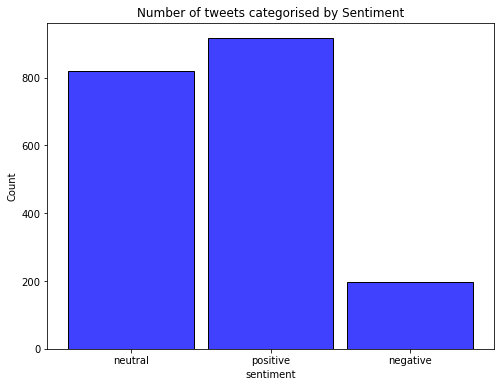

In [169]:
plt.figure(figsize = (8,6))

sns.histplot(data, x = 'sentiment', color = 'blue', shrink = 0.9)
plt.title('Number of tweets categorised by Sentiment')

plt.show()

### 6. sentiment analysis of bigram + trigram

In [170]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stop, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(data['pp_tweet'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})


In [171]:
df_ngram

,frequency,bigram/trigram
0,14,crew dragon
1,12,pretty much
2,12,giga berlin
3,11,falcon launch
4,10,first stage
...,...,...
14120,1,able check
14121,1,able carry science
14122,1,able carry
14123,1,aber vielleicht ein


In [172]:
df_ngram['p_score'] = df_ngram['bigram/trigram'].apply(lambda twt : sia.polarity_scores(twt))
df_ngram.head()

,frequency,bigram/trigram,p_score
0,14,crew dragon,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,12,pretty much,"{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'comp..."
2,12,giga berlin,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,11,falcon launch,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,10,first stage,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [173]:
df_ngram['c_score'] = df_ngram['p_score'].apply(lambda scores: scores['compound'])
df_ngram.head()

,frequency,bigram/trigram,p_score,c_score
0,14,crew dragon,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,12,pretty much,"{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'comp...",0.4939
2,12,giga berlin,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,11,falcon launch,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,10,first stage,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [174]:
def get_sentiment(value):
    if value < 0:
        return 'negative'
    elif value > 0:
        return 'positive'
    else:
        return 'neutral'
    
df_ngram['sentiment'] = df_ngram['c_score'].apply(get_sentiment)
df_ngram.head()

,frequency,bigram/trigram,p_score,c_score,sentiment
0,14,crew dragon,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,12,pretty much,"{'neg': 0.0, 'neu': 0.238, 'pos': 0.762, 'comp...",0.4939,positive
2,12,giga berlin,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,11,falcon launch,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,10,first stage,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [175]:
sentiment_counts = df_ngram.groupby(['sentiment']).size()
print(sentiment_counts)

sentiment
negative    1011
neutral     9910
positive    3204
dtype: int64


### 7. wordcloud

In [176]:
data_list = list(data['pp_tweet'])

pp_tweet_str = ' '.join(str(e) for e in data_list)
print(pp_tweet_str)

I alien ray trace cyberpunk hdr next level try great interview doge underestimate congratulation tesla china amazing execution last year next even happy new year ox frodo underdoge think would fail haha thank indeed tweet definitely represent real world time allocation entertaining outcome likely send agree clubhouse get real buy dogecoin lil x toddler hodler definitely issue sentencing seem bit high thank fix please unlock account u f u f true power haha crypto wallet win give private key avoid cost app suck nasa select falcon heavy launch first two element lunar gateway together one mission yes predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical amp economic endeavor however spacex need pass deep chasm negative cash flow next year low cost per ton carbon sequester net value product make must scalable g mean price country difference taxis amp shipping intend earth may idea apply mar u f u f xprize team manage carbon capture prize everyone tesla rec

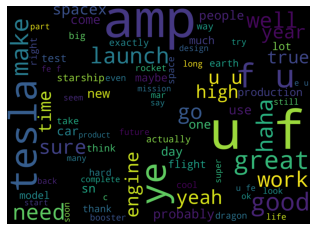

In [177]:
maskarray = np.array(Image.open("butterfly.png"))
cloud = WordCloud(background_color = "black", max_words = 80, mask = maskarray, stopwords = set(STOPWORDS))
cloud

cloud.generate(pp_tweet_str)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

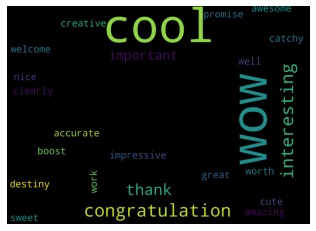

In [178]:
#separating positive words

with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")
    
#positive words wordcloud
pos_words = " ".join([w for w in data_list if w in poswords])

maskarray = np.array(Image.open("butterfly.png"))
cloud = WordCloud(background_color = "black", max_words = 300, mask = maskarray, stopwords = set(STOPWORDS))
cloud

cloud.generate(pos_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [179]:
pos_words

'wow destiny catchy congratulation awesome promise   important interesting   congratulation congratulation wow  cool well    interesting interesting worth accurate creative  congratulation sweet nice  wow interesting   welcome  great   thank cool    cool boost   wow impressive important clearly work cool  amazing cool thank cute wow thank '

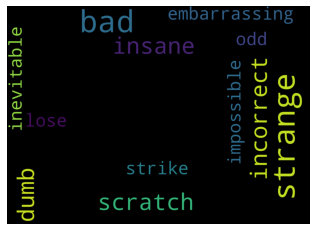

In [180]:
with open("negative-words.txt","r") as pos:
    negwords = pos.read().split("\n")
    
#negative word cloud
neg_words = " ".join([w for w in data_list if w in negwords])

maskarray = np.array(Image.open("butterfly.png"))
cloud = WordCloud(background_color = "black", max_words = 200, mask = maskarray, stopwords = set(STOPWORDS))
cloud

cloud.generate(neg_words)
#cloud.to_file("wordcloud.png")
plt.axis("off")
plt.imshow(cloud)

In [181]:
neg_words

'scratch dumb   strange incorrect   bad    strange         bad insane    embarrassing   strike odd lose  impossible inevitable '

In [182]:
a=len(pos_words)
b=len(neg_words)
c=len(pp_tweet_str)
print(a)
print(b)
print(c)

340
126
67280


### 8. model building

In [183]:
target_variable = data['sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [195]:
data['sentiment_binary'] = data['sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC

In [184]:
#function for confusion matrix

def plot_confusion_matrix(matrix):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    classNames = ['Positive', 'Negative']
    plt.title('Confusion Matrix')
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TP','FP'], ['FN', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

In [185]:
#function for naive model

def naive_model(x_train, x_test, y_train, y_test):
    naive_classifier = GaussianNB()
    naive_classifier.fit(x_train.toarray(), y_train)

    # predictions over test set
    predictions = naive_classifier.predict(x_test.toarray())

    # calculating Accuracy Score
    print(f'Accuracy Score = {accuracy_score(y_test, predictions)}')
    conf_matrix = confusion_matrix(y_test, predictions, labels=[True, False])
    plot_confusion_matrix(conf_matrix)

#### a) analysis of countvectorizer unigram

Accuracy Score = 0.7172413793103448


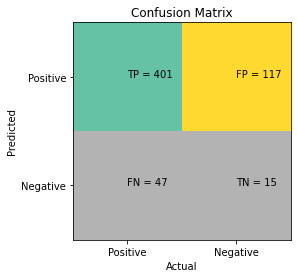

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x1, target_variable, test_size=0.3, random_state=272)
naive_model(x_train, x_test, y_train, y_test)

#### b) analysis of tf-idf vectorizer

Accuracy Score = 0.7172413793103448


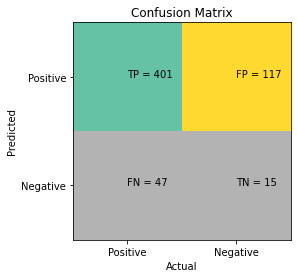

In [191]:
x_train, x_test, y_train, y_test = train_test_split(tfidf, target_variable, test_size=0.3, random_state=272)
naive_model(x_train, x_test, y_train, y_test)

#### c) analysis using sklearn pipeline

In [194]:
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer
from sklearn.linear_model import LogisticRegression

pili = make_pipeline(CountVectorizer(max_df=0.90, min_df=2, tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())


In [196]:
x_train, x_test, y_train, y_test = train_test_split(data.pp_tweet, data.sentiment_binary)

In [197]:
pili.fit(x_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_df=0.9, min_df=2, stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [198]:
pili.score(x_test,y_test) 

0.9028925619834711